In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.tsa.vector_ar.vecm import VECM, select_order
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import CointRankResults

import tqdm
tqdm = tqdm.tqdm_notebook

from matplotlib.patches import Ellipse
import scipy
import scipy.stats as sp
import scipy.optimize as opt

import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy
import scipy.stats as sp
import scipy.optimize as opt

import tqdm
tqdm = tqdm.tqdm_notebook

from scipy.ndimage.interpolation import shift

%matplotlib inline

np.warnings.filterwarnings('ignore')

/Users/bulat/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [617]:
df0 = pd.read_csv('/Users/bulat/Desktop/статьи_для_научной_работы_КуликовАВ/июнь/quarter_Krona_to_Dollar_and_Brent.csv')
df0.rename(columns={'DEXNOUS': 'ND','DCOILBRENTEU': 'OD'}, inplace=True)
df0.drop(df0.tail(1).index,inplace=True) # drop last row
df0['Quarter'] = pd.PeriodIndex(df0.DATE, freq='Q')
df = df0.set_index('Quarter')
df['ND']=df['ND'].astype(float)
df['OD']=df['OD'].astype(float)

df['DATE'] = pd.to_datetime(df['DATE'])
df  = df.set_index('DATE')


In [618]:
df.ND=-np.log(df.ND)
df['dND']=df['ND'].diff()

df.OD=np.log(df.OD)
df['dOD']=df['OD'].diff()

df = df.iloc[1: , :]


#print(dfb)
#print(dfa)
#dfb['dND']=dfb['ND'].diff()
#dfb['dOD']=dfb['OD'].diff()
#dfb = dfb.iloc[1: , :]


#dfa['dND']=dfa['ND'].diff()
#dfa['dOD']=dfa['OD'].diff()
#dfa = dfa.iloc[1: , :]


#dfb=-np.log(dfb)
#dfa=np.log(dfa)
print(df)


                  ND        OD       dND       dOD
DATE                                              
1988-01-01 -1.851069  2.750811  0.017507 -0.132063
1988-04-01 -1.835388  2.780671  0.015681  0.029860
1988-07-01 -1.924173  2.662133 -0.088786 -0.118538
1988-10-01 -1.889016  2.607885  0.035157 -0.054249
1989-01-01 -1.908192  2.867807 -0.019175  0.259923
...              ...       ...       ...       ...
2021-01-01 -2.141289  4.111509  0.059363  0.320152
2021-04-01 -2.125341  4.233843  0.015948  0.122334
2021-07-01 -2.171098  4.297409 -0.045758  0.063566
2021-10-01 -2.166651  4.377128  0.004448  0.079719
2022-01-01 -2.179874  4.613856 -0.013223  0.236728

[137 rows x 4 columns]


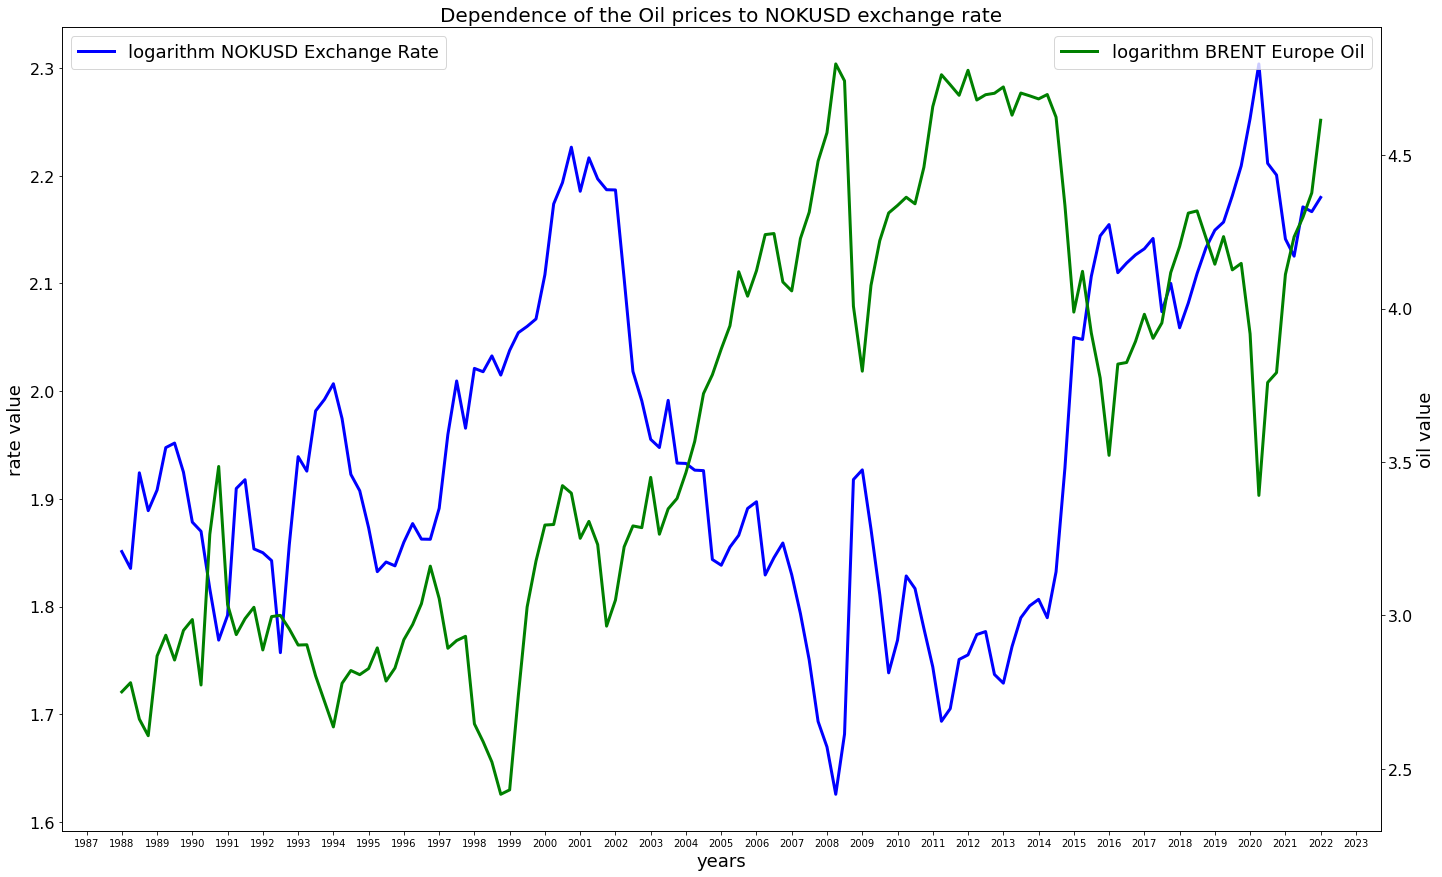

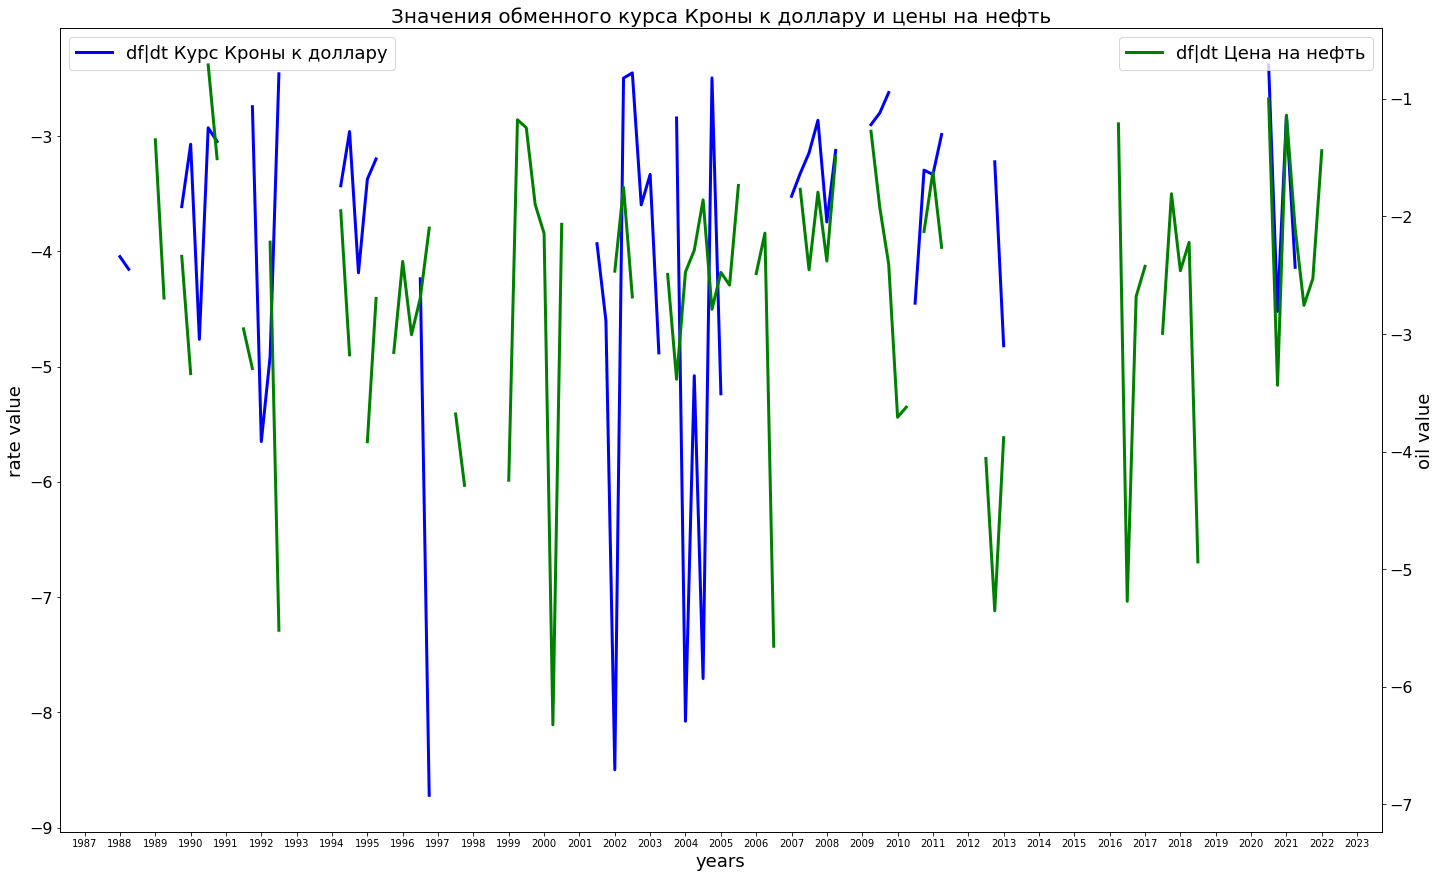

In [537]:
#4 Без логарифмов
fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.set_xlabel('years', fontsize = 18)
ax1.set_ylabel('rate value', fontsize = 18)
ax1.plot(-df.ND, color = 'blue', label = "logarithm NOKUSD Exchange Rate", linewidth = 3)

ax1.legend(loc="upper left", fontsize = 18)

plt.yticks(fontsize=16)

ax2 = ax1.twinx()  

ax2.set_ylabel('oil value', fontsize = 18)  
ax2.plot(df.OD, color = 'green', label = "logarithm BRENT Europe Oil", linewidth = 3)

ax2.legend(loc="upper right", fontsize = 18)

fig.tight_layout()  

plt.title("Dependence of the Oil prices to NOKUSD exchange rate", fontsize=20)

locator_years = matplotlib.dates.YearLocator()

ax1.xaxis.set_major_locator(locator_years)
ax2.xaxis.set_major_locator(locator_years)

plt.yticks(fontsize=16)


plt.show()



#5 С логарифмами
fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.set_xlabel('years', fontsize = 18)
ax1.set_ylabel('rate value', fontsize = 18)
ax1.plot(np.log(df.dND), color = 'blue', label = "df|dt Курс Кроны к доллару", linewidth = 3)

ax1.legend(loc="upper left", fontsize = 18)

plt.yticks(fontsize=16)

ax2 = ax1.twinx()  

ax2.set_ylabel('oil value', fontsize = 18)  
ax2.plot(np.log(df.dOD), color = 'green', label = "df|dt Цена на нефть", linewidth = 3)

ax2.legend(loc="upper right", fontsize = 18)

fig.tight_layout()  

plt.title("Значения обменного курса Кроны к доллару и цены на нефть", fontsize=20)

locator_years = matplotlib.dates.YearLocator()

ax1.xaxis.set_major_locator(locator_years)
ax2.xaxis.set_major_locator(locator_years)

plt.yticks(fontsize=16)


plt.show()

In [5]:
# Обозначим:

#zt=ln(yt) 
#ut=ln(xt) 
#Тогда рассматриваем модель вида:

#Δzt=αs(t)(as(t)ut−1+bs(t)−zt−1)+cs(t)Δut+ds(t)Δzt−1+σs(t)ϵt 
#P(s(t)=j|s(t−1)=i)=pij

Z = np.array(df.ND)
U = np.array(df.OD)
dZ = np.array(df.dND)
dU = np.array(df.dOD)

Z1= pd.DataFrame(Z,columns =['ND'])
U1 = pd.DataFrame(U,columns =['OD'])

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(U1,Z1)
r_sq = reg.score(U1,Z1)
print('coefficient of determination:', r_sq)
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)

coefficient of determination: 0.05536055773913362
intercept: [-2.13954449]
slope: [[0.05215448]]


In [6]:
# partial gradient, only for one index 
def p_grad(x, f, i, tol = 1e-6):       
    eps = np.full_like(x, 0)
    eps[i] += tol             
    grad = (f(x + eps) - f(x - eps)) / (2 * tol)
    return grad

# gradient
def grad(x, f, tol = 1e-6): 
    grad = np.full_like(x, 0)
    for i in len(x):
        grad[i] = p_grad(x, f, i, tol)
    grad = np.array(grad)
    return grad

# hessian
def hessian(x, f, tol=1e-6):  
    n = len(x) 
    hessian = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            hessian[i, j] = p_grad(x, lambda y: p_grad(y, f, j, tol), i, tol)
    
    return hessian


# partial gradient, only for one index 
def p_grad2(x, f, i, tol = 1e-6):       
    eps = np.full_like(x, 0)
    eps[i] += tol             
    grad = (f(x - 2 * eps) + 8 * f(x - eps) - 8 * f(x + eps) - f(x + 2 * eps)) / (12 * tol)
    return grad

# hessian
def hessian2(x, f, tol=1e-6):  
    n = len(x) 
    hessian = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            hessian[i, j] = p_grad2(x, lambda y: p_grad2(y, f, j, tol), i, tol)
    
    return hessian

# Сравнение моделей¶
В этом разделе произойдет уже более структурированное сравнение моделей (буду рассматривать значения AIC, BIC + само значение логарифмической функции правдоподобия) в зависимости от  ΔOilt−i  и  ΔFxt−j  при различных  i ,  j . Результаты заносятся в соответствующую таблицу (она в отдельном файле), получены с помощью расположенного ниже кода.

Самая общая модель:

Δzt=αs(t)(as(t)ut−1+bs(t)−zt−1)+cs(t)Δut+ds(t)Δzt−1+ 
+es(t)Δut−1+gs(t)Δut−2+hs(t)Δut−3+ks(t)Δut−4+ms(t)Δut−5+ 
+fs(t)Δzt−2+ns(t)Δzt−3+qs(t)Δzt−4+ws(t)Δzt−5+ 
+σs(t)ϵt

In [7]:
def model_compare(coefs, u, z, du, dz):
    
    a, b, alpha_0, c_0, d_0, f_0, n_0, q_0, w_0, e_0, g_0, h_0, k_0, m_0, alpha_1, c_1, d_1, f_1, n_1, q_1, w_1, e_1, g_1, h_1, k_1, m_1, p_01, p_10, sigma_0, sigma_1 = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + c_0 * du[1:] + d_0 * prev_dz[1:] + f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] + q_0 * prev_dz4[1:] + w_0 * prev_dz5[1:] +
                     e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
                    ) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:] + d_1 * prev_dz[1:] + f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:] + q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] +
                    e_1 * prev_du[1:] + g_1 * prev_du2[1:] + h_1 * prev_du3[1:] + k_1 * prev_du4[1:] + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_compare(coefs, u, z, du, dz):
    res = model_compare(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()


data_bounds_compare = {
    'a': (0, 2), 
    'b': (-6, 0), 
    
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    'd_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    'q_0': (-1, 1),    
    'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.0001, 0.3),
    'sigma_1': (0.0001, 0.3)
}

all_vars_compare = ['a', 'b', 'alpha_0', 'c_0', 'd_0', 'f_0', 'n_0', 'q_0', 'w_0', 'e_0', 'g_0', 'h_0', 'k_0', 'm_0', 'alpha_1', 'c_1', 'd_1', 'f_1', 'n_1', 'q_1', 'w_1', 'e_1', 'g_1', 'h_1', 'k_1', 'm_1', 'p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_compare = ((0, 2), (-6, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

data_bounds_compare


{'a': (0, 2),
 'b': (-6, 0),
 'alpha_0': (-1, 1),
 'c_0': (-1, 1),
 'd_0': (-1, 1),
 'f_0': (-1, 1),
 'n_0': (-1, 1),
 'q_0': (-1, 1),
 'w_0': (-1, 1),
 'e_0': (-1, 1),
 'g_0': (-1, 1),
 'h_0': (-1, 1),
 'k_0': (-1, 1),
 'm_0': (-1, 1),
 'alpha_1': (0, 1),
 'c_1': (-1, 1),
 'd_1': (-1, 1),
 'f_1': (-1, 1),
 'n_1': (-1, 1),
 'q_1': (-1, 1),
 'w_1': (-1, 1),
 'e_1': (-1, 1),
 'g_1': (-1, 1),
 'h_1': (-1, 1),
 'k_1': (-1, 1),
 'm_1': (-1, 1),
 'p_01': (0, 1),
 'p_10': (0, 1),
 'sigma_0': (0.0001, 0.3),
 'sigma_1': (0.0001, 0.3)}

In [8]:
n_loops = 200
#n_loops = 100

df_res_comp = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_compare + [x + '_init' for x in all_vars_compare])


for colum in ['fun'] + all_vars_compare + [x + '_init' for x in all_vars_compare]:
    df_res_comp[colum] = df_res_comp[colum].map(float)
#################    
max_iter = 10000

for i in tqdm(range(n_loops)):
    
    init_data = [np.random.uniform(*data_bounds_compare[x]) for x in all_vars_compare]

    current_res = opt.minimize(log_model_compare,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_compare,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))
    df_res_comp.loc[i, 'fun'] = current_res.fun
    df_res_comp.loc[i, 'success'] = current_res.success
    df_res_comp.loc[i, all_vars_compare] = current_res.x
    df_res_comp.loc[i, [x + '_init' for x in all_vars_compare]] = init_data
    
print('complete')
#################
df_res_comp.loc[df_res_comp.fun.idxmin()]


complete


fun            -312.977091
success              False
a                 0.166494
b                -2.688996
alpha_0           -0.03613
                   ...    
m_1_init          0.083826
p_01_init         0.348365
p_10_init         0.912845
sigma_0_init      0.203796
sigma_1_init      0.230635
Name: 78, Length: 62, dtype: object

In [9]:
def hess_model_comp(arr):
    return log_model_compare(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_res_comp.loc[df_res_comp.fun.idxmin(), [x + '_init' for x in all_vars_compare]]
#init_data = rez.estimation
max_iter = 10000
#max_iter = 100

cur_res = opt.minimize(log_model_compare,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_compare,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_comp, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_compare)), dtype='float')

for i in range(len(all_vars_compare)):
    rez.loc[i, 'variable'] = all_vars_compare[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)
# число параметров модели
n_params = 30

# объем выборки
data_len = len(df)

ll = - cur_res.fun
AIC = 2 * n_params - 2 * ll
BIC = n_params * np.log(data_len) - 2 * ll

print('AIC = ', AIC)
print('BIC = ', BIC)


Log Likelihood =  312.9770907394193


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1665,0.0148,0.1955,0.1375,0.00%
1,b,-2.6890,0.0614,-2.5687,-2.8093,0.00%
2,alpha_0,-0.0361,0.0078,-0.0208,-0.0514,0.00%
3,c_0,0.1096,0.0119,0.1329,0.0863,0.00%
4,d_0,-0.0192,0.0488,0.0763,-0.1148,69.34%
5,f_0,0.1970,0.0483,0.2916,0.1024,0.00%
6,n_0,0.2256,0.0424,0.3088,0.1424,0.00%
7,q_0,0.0435,0.0435,0.1288,-0.0418,31.76%
8,w_0,-0.0678,0.0406,0.0118,-0.1473,9.49%
9,e_0,-0.0210,0.0141,0.0067,-0.0487,13.73%


AIC =  -565.9541814788386
BIC =  -478.3547537039948


In [ ]:
#убираем f_1

In [10]:
def model_aic_1(coefs, u, z, du, dz):
    [a,
    b,
    alpha_0,
    c_0,
    d_0,
    f_0, n_0, 
    q_0,
    w_0,e_0, 
    g_0,
     h_0,
    k_0,
     m_0, alpha_1, c_1,d_1,
     #f_1,
     n_1, q_1, w_1,e_1,
     g_1,
     h_1, k_1, m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + c_0 * du[1:] + d_0 * prev_dz[1:] + f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     q_0*prev_dz4[1:] +
                     w_0 * prev_dz5[1:]+e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    ) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:]+
                    #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+
                    g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + k_1 * prev_du4[1:] + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_1(coefs, u, z, du, dz):
    res = model_aic_1(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()

data_bounds_aic_1= {
    'a': (0, 2), 
    'b': (-4, 0), 
    
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    'd_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    'q_0': (-1, 1),
    'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_1 = ['a', 'b', 'alpha_0', 'c_0', 'd_0','f_0', 'n_0',
                  'q_0',
                  'w_0', 'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1',
                  'g_1',
                  'h_1','k_1', 'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_1 = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),(-1, 1),(-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [11]:
df_res_0=df_res_comp.loc[df_res_comp.fun.idxmin()]
df_1 = df_res_comp.loc[df_res_comp.fun.idxmin()].drop(labels=['f_1','f_1_init'])

In [12]:
df_res_comp.loc[df_res_comp.fun.idxmin()]

fun            -312.977091
success              False
a                 0.166494
b                -2.688996
alpha_0           -0.03613
                   ...    
m_1_init          0.083826
p_01_init         0.348365
p_10_init         0.912845
sigma_0_init      0.203796
sigma_1_init      0.230635
Name: 78, Length: 62, dtype: object

In [13]:
elem_pos = [*range(2, 31, 1)]
df_1_init = df_1.take(elem_pos)
df_1_init

a          0.166494
b         -2.688996
alpha_0    -0.03613
c_0        0.109571
d_0       -0.019224
f_0        0.197005
n_0        0.225613
q_0        0.043498
w_0       -0.067779
e_0       -0.021013
g_0       -0.052296
h_0       -0.092572
k_0       -0.039427
m_0        0.041178
alpha_1     0.14561
c_1        0.252801
d_1        0.207765
n_1       -0.072068
q_1       -0.836789
w_1        0.261945
e_1        0.051193
g_1       -0.004349
h_1        0.042682
k_1        0.150057
m_1        0.095647
p_01       0.292909
p_10       0.796022
sigma_0    0.024847
sigma_1    0.004237
Name: 78, dtype: object

In [14]:
df_res_aic_1 = df_1
init_data=df_1_init
init_data

a          0.166494
b         -2.688996
alpha_0    -0.03613
c_0        0.109571
d_0       -0.019224
f_0        0.197005
n_0        0.225613
q_0        0.043498
w_0       -0.067779
e_0       -0.021013
g_0       -0.052296
h_0       -0.092572
k_0       -0.039427
m_0        0.041178
alpha_1     0.14561
c_1        0.252801
d_1        0.207765
n_1       -0.072068
q_1       -0.836789
w_1        0.261945
e_1        0.051193
g_1       -0.004349
h_1        0.042682
k_1        0.150057
m_1        0.095647
p_01       0.292909
p_10       0.796022
sigma_0    0.024847
sigma_1    0.004237
Name: 78, dtype: object

In [15]:

n_loops = 200

df_res_aic_1 = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_1 + [x + '_init' for x in all_vars_aic_1])

for colum in ['fun'] + all_vars_aic_1 + [x + '_init' for x in all_vars_aic_1]:
    df_res_aic_1[colum] = df_res_aic_1[colum].map(float)
    
    

In [16]:
max_iter = 10000

for i in tqdm(range(n_loops)):
    
    #init_data = df_0_init
    init_data = [(df_1_init[x]) for x in all_vars_aic_1]
    current_res = opt.minimize(log_model_aic_1,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_1,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_1.loc[i, 'fun'] = current_res.fun
    df_res_aic_1.loc[i, 'success'] = current_res.success
    df_res_aic_1.loc[i, all_vars_aic_1] = current_res.x
    df_res_aic_1.loc[i, [x + '_init' for x in all_vars_aic_1]] = init_data

In [17]:
df_res_aic_1.loc[df_res_aic_1.fun.idxmin()]

fun            -312.973182
success               True
a                 0.164701
b                -2.681403
alpha_0          -0.036324
c_0               0.109807
d_0              -0.018378
f_0               0.195544
n_0               0.226254
q_0                0.04365
w_0              -0.067486
e_0               -0.02131
g_0              -0.052003
h_0              -0.092583
k_0              -0.039722
m_0               0.041215
alpha_1            0.14637
c_1               0.252227
d_1               0.209048
n_1              -0.070365
q_1              -0.837159
w_1               0.257068
e_1               0.051295
g_1              -0.005482
h_1               0.042598
k_1               0.150469
m_1               0.096478
p_01              0.295093
p_10              0.797556
sigma_0            0.02485
sigma_1           0.004267
a_init            0.166494
b_init           -2.688996
alpha_0_init      -0.03613
c_0_init          0.109571
d_0_init         -0.019224
f_0_init          0.197005
n

In [18]:
def hess_model_aic_1(arr):
    return log_model_aic_1(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_1_init

max_iter = 100000

cur_res = opt.minimize(log_model_aic_1,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_1,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_1, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_1)), dtype='float')

for i in range(len(all_vars_aic_1)):
    rez.loc[i, 'variable'] = all_vars_aic_1[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)

Log Likelihood =  312.9731821687176


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1647,0.0084,0.1812,0.1482,0.00%
1,b,-2.6814,0.0340,-2.6148,-2.7480,0.00%
2,alpha_0,-0.0363,0.0077,-0.0211,-0.0515,0.00%
3,c_0,0.1098,0.0119,0.1331,0.0865,0.00%
4,d_0,-0.0184,0.0487,0.0771,-0.1139,70.61%
5,f_0,0.1955,0.0475,0.2887,0.1024,0.00%
6,n_0,0.2263,0.0425,0.3095,0.1430,0.00%
7,q_0,0.0436,0.0434,0.1287,-0.0414,31.47%
8,w_0,-0.0675,0.0406,0.0122,-0.1471,9.68%
9,e_0,-0.0213,0.0141,0.0063,-0.0490,13.09%


In [19]:
ll_1 = - cur_res.fun

In [20]:
# число параметров модели
n_params = 29

# объем выборки
data_len = len(df)


AIC_1 = 2 * n_params - 2 * ll_1
BIC_1 = n_params * np.log(data_len) - 2 * ll_1

print('ll = ', ll)
print('AIC = ', AIC)
print('\n')
print('ll_1= ',ll_1)
print('AIC_1 = ', AIC_1)
print('BIC_1 = ', BIC_1)

ll =  312.9770907394193
AIC =  -565.9541814788386


ll_1=  312.9731821687176
AIC_1 =  -567.9463643374352
BIC_1 =  -483.26691748841955


In [21]:
# убрали f_1, модель улучшилась, значит убираем дальше d_0!

In [22]:
df_res_1f=df_res_aic_1.loc[df_res_aic_1.fun.idxmin()]

In [24]:
df_2 = df_res_1f
df_2=df_2.drop(labels=['d_0','d_0_init'])

In [25]:
df_2

fun            -312.973182
success               True
a                 0.164701
b                -2.681403
alpha_0          -0.036324
c_0               0.109807
f_0               0.195544
n_0               0.226254
q_0                0.04365
w_0              -0.067486
e_0               -0.02131
g_0              -0.052003
h_0              -0.092583
k_0              -0.039722
m_0               0.041215
alpha_1            0.14637
c_1               0.252227
d_1               0.209048
n_1              -0.070365
q_1              -0.837159
w_1               0.257068
e_1               0.051295
g_1              -0.005482
h_1               0.042598
k_1               0.150469
m_1               0.096478
p_01              0.295093
p_10              0.797556
sigma_0            0.02485
sigma_1           0.004267
a_init            0.166494
b_init           -2.688996
alpha_0_init      -0.03613
c_0_init          0.109571
f_0_init          0.197005
n_0_init          0.225613
q_0_init          0.043498
w

In [27]:
elem_pos2 = [*range(2, 30, 1)]
df_2_init = df_2.take(elem_pos2)
df_2_init

a          0.164701
b         -2.681403
alpha_0   -0.036324
c_0        0.109807
f_0        0.195544
n_0        0.226254
q_0         0.04365
w_0       -0.067486
e_0        -0.02131
g_0       -0.052003
h_0       -0.092583
k_0       -0.039722
m_0        0.041215
alpha_1     0.14637
c_1        0.252227
d_1        0.209048
n_1       -0.070365
q_1       -0.837159
w_1        0.257068
e_1        0.051295
g_1       -0.005482
h_1        0.042598
k_1        0.150469
m_1        0.096478
p_01       0.295093
p_10       0.797556
sigma_0     0.02485
sigma_1    0.004267
Name: 0, dtype: object

In [28]:
df_res_aic_2 = df_2
init_data=df_2_init
init_data

a          0.164701
b         -2.681403
alpha_0   -0.036324
c_0        0.109807
f_0        0.195544
n_0        0.226254
q_0         0.04365
w_0       -0.067486
e_0        -0.02131
g_0       -0.052003
h_0       -0.092583
k_0       -0.039722
m_0        0.041215
alpha_1     0.14637
c_1        0.252227
d_1        0.209048
n_1       -0.070365
q_1       -0.837159
w_1        0.257068
e_1        0.051295
g_1       -0.005482
h_1        0.042598
k_1        0.150469
m_1        0.096478
p_01       0.295093
p_10       0.797556
sigma_0     0.02485
sigma_1    0.004267
Name: 0, dtype: object

In [29]:
def model_aic_2(coefs, u, z, du, dz):
    [a,
    b,
    alpha_0,
    c_0,
    #d_0,
    f_0, n_0, 
    q_0,
    w_0,
     e_0, g_0, h_0,k_0, m_0, alpha_1, c_1,d_1,
     #f_1,
     n_1, q_1, w_1,e_1,g_1, h_1, k_1, m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + c_0 * du[1:] +
                     #d_0 * prev_dz[1:] +
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     q_0*prev_dz4[1:] +
                     w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] + h_0 * prev_du3[1:]+ k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
                    ) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + k_1 * prev_du4[1:] + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_2(coefs, u, z, du, dz):
    res = model_aic_2(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()

data_bounds_aic_2= {
    'a': (0, 2), 
    'b': (-4, 0), 
    
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    'q_0': (-1, 1),
    'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_2 = ['a', 'b', 'alpha_0', 'c_0',
                  #'d_0',
                  'f_0', 'n_0',
                  'q_0',
                  'w_0',
                  'e_0','g_0', 'h_0','k_0','m_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1','g_1','h_1','k_1', 'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_2 = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),(-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [30]:
n_loops = 200

df_res_aic_2 = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_2 + [x + '_init' for x in all_vars_aic_2])

for colum in ['fun'] + all_vars_aic_2 + [x + '_init' for x in all_vars_aic_2]:
    df_res_aic_2[colum] = df_res_aic_2[colum].map(float)
    

max_iter = 10000

for i in tqdm(range(n_loops)):
    
    #init_data = df_0_init
    init_data = [(df_2_init[x]) for x in all_vars_aic_2]
    current_res = opt.minimize(log_model_aic_2,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_2,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_2.loc[i, 'fun'] = current_res.fun
    df_res_aic_2.loc[i, 'success'] = current_res.success
    df_res_aic_2.loc[i, all_vars_aic_2] = current_res.x
    df_res_aic_2.loc[i, [x + '_init' for x in all_vars_aic_2]] = init_data
    
    
    

In [31]:
def hess_model_aic_2(arr):
    return log_model_aic_2(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_2_init

max_iter = 10000

cur_res = opt.minimize(log_model_aic_2,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_2,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_2, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_2)), dtype='float')

for i in range(len(all_vars_aic_2)):
    rez.loc[i, 'variable'] = all_vars_aic_2[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)

Log Likelihood =  312.9476518836595


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1647,0.0085,0.1814,0.1480,0.00%
1,b,-2.6814,0.0344,-2.6140,-2.7488,0.00%
2,alpha_0,-0.0361,0.0077,-0.0209,-0.0513,0.00%
3,c_0,0.1100,0.0119,0.1333,0.0867,0.00%
4,f_0,0.1916,0.0465,0.2827,0.1006,0.00%
5,n_0,0.2288,0.0421,0.3112,0.1464,0.00%
6,q_0,0.0419,0.0433,0.1267,-0.0429,33.24%
7,w_0,-0.0647,0.0401,0.0138,-0.1432,10.63%
8,e_0,-0.0248,0.0107,-0.0038,-0.0458,2.08%
9,g_0,-0.0525,0.0123,-0.0284,-0.0765,0.00%


In [32]:
ll_2 = - cur_res.fun

In [33]:
# число параметров модели
n_params = 28

# объем выборки
data_len = len(df)


AIC_2 = 2 * n_params - 2 * ll_2
BIC_2 = n_params * np.log(data_len) - 2 * ll_2

print('AIC = ', AIC_2)
print('BIC = ', BIC_2)

AIC =  -569.895303767319
BIC =  -488.1358378441315


In [34]:
print('ll =',ll)
print('AIC = ', AIC)
print('BIC = ', BIC)
print('\n')
print('ll_1 убрали f_1=',ll_1)
print('AIC_1 убрали f_1= ', AIC_1)
print('BIC_1убрали f_1 = ', BIC_1)
print('\n')
print('ll_2 d_0=',ll_2)
print('AIC_2 d_0= ', AIC_2)
print('BIC_2 d_0= ', BIC_2)

ll = 312.9770907394193
AIC =  -565.9541814788386
BIC =  -478.3547537039948


ll_1 убрали f_1= 312.9731821687176
AIC_1 убрали f_1=  -567.9463643374352
BIC_1убрали f_1 =  -483.26691748841955


ll_2 d_0= 312.9476518836595
AIC_2 d_0=  -569.895303767319
BIC_2 d_0=  -488.1358378441315


In [35]:
# Модель стала лучше, убираем q_0


In [36]:
df_res_3f=df_res_aic_2.loc[df_res_aic_2.fun.idxmin()]


In [37]:
df_3 = df_res_3f.drop(labels=['q_0','q_0_init'])


In [39]:
elem_pos3 = [*range(2, 29, 1)]
df_3_init = df_3.take(elem_pos3)

df_3_init

a          0.164705
b         -2.681359
alpha_0   -0.036118
c_0        0.109981
f_0        0.191613
n_0        0.228824
w_0       -0.064694
e_0       -0.024774
g_0       -0.052457
h_0       -0.092074
k_0       -0.038544
m_0        0.041691
alpha_1    0.146327
c_1        0.252243
d_1        0.208795
n_1       -0.071257
q_1       -0.836896
w_1        0.257138
e_1        0.051396
g_1        -0.00549
h_1        0.042658
k_1        0.150468
m_1        0.096378
p_01       0.295195
p_10       0.799779
sigma_0    0.024881
sigma_1    0.004268
Name: 0, dtype: object

In [40]:
df_res_aic_3 = df_3
init_data=df_3_init
init_data

a          0.164705
b         -2.681359
alpha_0   -0.036118
c_0        0.109981
f_0        0.191613
n_0        0.228824
w_0       -0.064694
e_0       -0.024774
g_0       -0.052457
h_0       -0.092074
k_0       -0.038544
m_0        0.041691
alpha_1    0.146327
c_1        0.252243
d_1        0.208795
n_1       -0.071257
q_1       -0.836896
w_1        0.257138
e_1        0.051396
g_1        -0.00549
h_1        0.042658
k_1        0.150468
m_1        0.096378
p_01       0.295195
p_10       0.799779
sigma_0    0.024881
sigma_1    0.004268
Name: 0, dtype: object

In [41]:
df_res_aic_3

fun            -312.947652
success               True
a                 0.164705
b                -2.681359
alpha_0          -0.036118
c_0               0.109981
f_0               0.191613
n_0               0.228824
w_0              -0.064694
e_0              -0.024774
g_0              -0.052457
h_0              -0.092074
k_0              -0.038544
m_0               0.041691
alpha_1           0.146327
c_1               0.252243
d_1               0.208795
n_1              -0.071257
q_1              -0.836896
w_1               0.257138
e_1               0.051396
g_1               -0.00549
h_1               0.042658
k_1               0.150468
m_1               0.096378
p_01              0.295195
p_10              0.799779
sigma_0           0.024881
sigma_1           0.004268
a_init            0.164701
b_init           -2.681403
alpha_0_init     -0.036324
c_0_init          0.109807
f_0_init          0.195544
n_0_init          0.226254
w_0_init         -0.067486
e_0_init          -0.02131
g

In [42]:
def model_aic_3(coefs, u, z, du, dz):
    [a,
    b,
    alpha_0,
    c_0,
    #d_0,
    f_0,
     n_0, 
    #q_0,
    w_0,
    e_0, 
    g_0,
     h_0,
    k_0,
     m_0, alpha_1, c_1,d_1, 
     #f_1,
     n_1, q_1, w_1,e_1,g_1, h_1, k_1, m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + c_0 * du[1:] + 
                     #d_0 * prev_dz[1:] + 
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     #q_0*prev_dz4[1:] +
                     w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    ) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] + 
                    #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + k_1 * prev_du4[1:] + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_3(coefs, u, z, du, dz):
    res = model_aic_3(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()

data_bounds_aic_3= {
    'a': (0, 2), 
    'b': (-4, 0), 
    
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    #'q_0': (-1, 1),
    'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_3 = ['a', 'b', 'alpha_0', 'c_0',
                  #'d_0',
                  'f_0',
                  'n_0',
                  #'q_0',
                  'w_0',
                  'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1','g_1','h_1','k_1', 'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_3 = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [43]:
n_loops = 200

df_res_aic_3 = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_3 + [x + '_init' for x in all_vars_aic_3])

for colum in ['fun'] + all_vars_aic_3 + [x + '_init' for x in all_vars_aic_3]:
    df_res_aic_3[colum] = df_res_aic_3[colum].map(float)
    

max_iter = 10000

for i in tqdm(range(n_loops)):
    
    #init_data = df_0_init
    init_data = [(df_3_init[x]) for x in all_vars_aic_3]
    current_res = opt.minimize(log_model_aic_3,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_3,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_3.loc[i, 'fun'] = current_res.fun
    df_res_aic_3.loc[i, 'success'] = current_res.success
    df_res_aic_3.loc[i, all_vars_aic_3] = current_res.x
    df_res_aic_3.loc[i, [x + '_init' for x in all_vars_aic_3]] = init_data
    
def hess_model_aic_3(arr):
    return log_model_aic_3(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_3_init

max_iter = 10000

cur_res = opt.minimize(log_model_aic_3,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_3,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_3, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_3)), dtype='float')

for i in range(len(all_vars_aic_3)):
    rez.loc[i, 'variable'] = all_vars_aic_3[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)



Log Likelihood =  312.7779592049434


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1650,0.0086,0.1820,0.1481,0.00%
1,b,-2.6825,0.0349,-2.6141,-2.7509,0.00%
2,alpha_0,-0.0367,0.0077,-0.0216,-0.0519,0.00%
3,c_0,0.1103,0.0119,0.1337,0.0870,0.00%
4,f_0,0.1927,0.0465,0.2838,0.1015,0.00%
5,n_0,0.2326,0.0419,0.3148,0.1504,0.00%
6,w_0,-0.0626,0.0401,0.0159,-0.1412,11.80%
7,e_0,-0.0246,0.0108,-0.0035,-0.0457,2.20%
8,g_0,-0.0517,0.0122,-0.0277,-0.0757,0.00%
9,h_0,-0.0917,0.0118,-0.0685,-0.1149,0.00%


In [44]:
ll_03 = - cur_res.fun

In [45]:
# число параметров модели
n_params = 27

# объем выборки
data_len = len(df)


AIC_03 = 2 * n_params - 2 * ll_03
BIC_03 = n_params * np.log(data_len) - 2 * ll_03

print('AIC = ', AIC_03)
print('BIC = ', BIC_03)

AIC =  -571.5559184098868
BIC =  -492.7164334125274


In [47]:
print('ll =',ll)
print('AIC = ', AIC)
print('BIC = ', BIC)
print('\n')
print('ll_1 убрали f_1=',ll_1)
print('AIC_1 убрали f_1= ', AIC_1)
print('BIC_1убрали f_1 = ', BIC_1)
print('\n')
print('ll_2 убрали d_0=',ll_2)
print('AIC_2 убрали d_0= ', AIC_2)
print('BIC_2 убрали d_0= ', BIC_2)
print('\n')
print('ll_3 убрали  q_0=',ll_03)
print('AIC_3 убрали q_0= ', AIC_03)
print('BIC_3 убрали q_0= ', BIC_03)

ll = 312.9770907394193
AIC =  -565.9541814788386
BIC =  -478.3547537039948


ll_1 убрали f_1= 312.9731821687176
AIC_1 убрали f_1=  -567.9463643374352
BIC_1убрали f_1 =  -483.26691748841955


ll_2 убрали d_0= 312.9476518836595
AIC_2 убрали d_0=  -569.895303767319
BIC_2 убрали d_0=  -488.1358378441315


ll_3 убрали  q_0= 312.7779592049434
AIC_3 убрали q_0=  -571.5559184098868
BIC_3 убрали q_0=  -492.7164334125274


In [48]:
# убираем дальше у модели  w_0

In [50]:
df_res_4f=df_res_aic_3.loc[df_res_aic_3.fun.idxmin()]


In [51]:
df_4 = df_res_4f.drop(labels=['w_0','w_0_init'])

In [53]:
elem_pos4 = [*range(2, 28, 1)]
df_4_init = df_4.take(elem_pos4)

df_4_init

a          0.165014
b         -2.682485
alpha_0   -0.036749
c_0        0.110335
f_0        0.192658
n_0        0.232634
e_0       -0.024619
g_0       -0.051718
h_0       -0.091663
k_0       -0.033637
m_0        0.042805
alpha_1    0.146266
c_1        0.252349
d_1        0.208911
n_1       -0.071668
q_1       -0.836757
w_1        0.257819
e_1         0.05136
g_1       -0.005347
h_1        0.042597
k_1        0.150423
m_1        0.096204
p_01       0.294013
p_10       0.799118
sigma_0     0.02494
sigma_1    0.004258
Name: 0, dtype: object

In [54]:
df_res_aic_4=df_4

In [55]:
df_res_aic_4

fun            -312.777959
success               True
a                 0.165014
b                -2.682485
alpha_0          -0.036749
c_0               0.110335
f_0               0.192658
n_0               0.232634
e_0              -0.024619
g_0              -0.051718
h_0              -0.091663
k_0              -0.033637
m_0               0.042805
alpha_1           0.146266
c_1               0.252349
d_1               0.208911
n_1              -0.071668
q_1              -0.836757
w_1               0.257819
e_1                0.05136
g_1              -0.005347
h_1               0.042597
k_1               0.150423
m_1               0.096204
p_01              0.294013
p_10              0.799118
sigma_0            0.02494
sigma_1           0.004258
a_init            0.164705
b_init           -2.681359
alpha_0_init     -0.036118
c_0_init          0.109981
f_0_init          0.191613
n_0_init          0.228824
e_0_init         -0.024774
g_0_init         -0.052457
h_0_init         -0.092074
k

In [56]:
def model_aic_4(coefs, u, z, du, dz):
    [a,
    b,
    alpha_0,
    c_0,
    #d_0,
    f_0,
    n_0, 
    #q_0,
    #w_0,
    e_0, 
    g_0,
    h_0,
    k_0,
     m_0, alpha_1, c_1,d_1,
     #f_1,
     n_1, q_1, w_1,e_1,g_1, h_1, k_1, m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + c_0 * du[1:] + 
                     #d_0 * prev_dz[1:] + 
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     #q_0*prev_dz4[1:] +
                     #w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    ) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + k_1 * prev_du4[1:] + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_4(coefs, u, z, du, dz):
    res = model_aic_4(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()

data_bounds_aic_4= {
    'a': (0, 2), 
    'b': (-4, 0), 
    
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    #'q_0': (-1, 1),
    #'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_4 = ['a', 'b', 'alpha_0', 'c_0',
                  #'d_0',
                  'f_0',
                  'n_0',
                  #'q_0',
                  #'w_0',
                  'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1','g_1','h_1','k_1', 'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_4 = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [57]:
n_loops = 200

df_res_aic_4 = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_4 + [x + '_init' for x in all_vars_aic_4])

for colum in ['fun'] + all_vars_aic_4 + [x + '_init' for x in all_vars_aic_4]:
    df_res_aic_4[colum] = df_res_aic_4[colum].map(float)
    

max_iter = 10000

for i in tqdm(range(n_loops)):
    
    #init_data = df_0_init
    init_data = [(df_4_init[x]) for x in all_vars_aic_4]
    current_res = opt.minimize(log_model_aic_4,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_4,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_4.loc[i, 'fun'] = current_res.fun
    df_res_aic_4.loc[i, 'success'] = current_res.success
    df_res_aic_4.loc[i, all_vars_aic_4] = current_res.x
    df_res_aic_4.loc[i, [x + '_init' for x in all_vars_aic_4]] = init_data
    
def hess_model_aic_4(arr):
    return log_model_aic_4(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_4_init

max_iter = 10000

cur_res = opt.minimize(log_model_aic_4,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_4,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_4, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_4)), dtype='float')

for i in range(len(all_vars_aic_4)):
    rez.loc[i, 'variable'] = all_vars_aic_4[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)


Log Likelihood =  312.34129787641274


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1643,0.0086,0.1811,0.1475,0.00%
1,b,-2.6799,0.0347,-2.6118,-2.7480,0.00%
2,alpha_0,-0.0375,0.0078,-0.0223,-0.0527,0.00%
3,c_0,0.1089,0.0119,0.1322,0.0856,0.00%
4,f_0,0.1862,0.0470,0.2783,0.0941,0.01%
5,n_0,0.2334,0.0422,0.3160,0.1507,0.00%
6,e_0,-0.0235,0.0108,-0.0025,-0.0446,2.86%
7,g_0,-0.0516,0.0124,-0.0273,-0.0758,0.00%
8,h_0,-0.0931,0.0119,-0.0699,-0.1163,0.00%
9,k_0,-0.0354,0.0122,-0.0116,-0.0593,0.36%


In [58]:
ll_4 = - cur_res.fun

In [59]:
# число параметров модели
n_params = 26

# объем выборки
data_len = len(df)


AIC_4 = 2 * n_params - 2 * ll_4
BIC_4 = n_params * np.log(data_len) - 2 * ll_4

print('AIC = ', AIC_4)
print('BIC = ', BIC_4)

AIC =  -572.6825957528255
BIC =  -496.7630916812942


In [61]:
print('ll =',ll)
print('AIC = ', AIC)
print('BIC = ', BIC)
print('\n')
print('ll_1 убрали f_1=',ll_1)
print('AIC_1 убрали f_1= ', AIC_1)
print('BIC_1убрали f_1 = ', BIC_1)
print('\n')
print('ll_2 убрали d_0=',ll_2)
print('AIC_2 убрали d_0= ', AIC_2)
print('BIC_2 убрали d_0= ', BIC_2)
print('\n')
print('ll_3 убрали  q_0=',ll_03)
print('AIC_3 убрали q_0= ', AIC_03)
print('BIC_3 убрали q_0= ', BIC_03)
print('\n')
print('ll_3 убрали  w_0=',ll_4)
print('AIC_3 убрали w_0= ', AIC_4)
print('BIC_3 убрали w_0= ', BIC_4)

ll = 312.9770907394193
AIC =  -565.9541814788386
BIC =  -478.3547537039948


ll_1 убрали f_1= 312.9731821687176
AIC_1 убрали f_1=  -567.9463643374352
BIC_1убрали f_1 =  -483.26691748841955


ll_2 убрали d_0= 312.9476518836595
AIC_2 убрали d_0=  -569.895303767319
BIC_2 убрали d_0=  -488.1358378441315


ll_3 убрали  q_0= 312.7779592049434
AIC_3 убрали q_0=  -571.5559184098868
BIC_3 убрали q_0=  -492.7164334125274


ll_3 убрали  w_0= 312.34129787641274
AIC_3 убрали w_0=  -572.6825957528255
BIC_3 убрали w_0=  -496.7630916812942


In [62]:
# улучшилась, удаляем g_1

In [63]:
df_t_5=df_res_aic_4.loc[df_res_aic_4.fun.idxmin()]

In [64]:
df_5 = df_t_5.drop(labels=['g_1','g_1_init'])

In [65]:
df_5

fun            -312.341298
success               True
a                 0.164279
b                -2.679885
alpha_0          -0.037477
c_0               0.108929
f_0               0.186173
n_0               0.233393
e_0              -0.023544
g_0              -0.051583
h_0              -0.093114
k_0              -0.035426
m_0               0.030319
alpha_1           0.146363
c_1               0.252037
d_1                0.20908
n_1               -0.06989
q_1              -0.837527
w_1               0.254675
e_1               0.051359
h_1               0.042653
k_1               0.150588
m_1               0.096817
p_01              0.294619
p_10              0.797926
sigma_0           0.025057
sigma_1           0.004275
a_init            0.165014
b_init           -2.682485
alpha_0_init     -0.036749
c_0_init          0.110335
f_0_init          0.192658
n_0_init          0.232634
e_0_init         -0.024619
g_0_init         -0.051718
h_0_init         -0.091663
k_0_init         -0.033637
m

In [67]:
elem_pos5 = [*range(2, 27, 1)]
df_5_init = df_5.take(elem_pos5)

df_5_init

a          0.164279
b         -2.679885
alpha_0   -0.037477
c_0        0.108929
f_0        0.186173
n_0        0.233393
e_0       -0.023544
g_0       -0.051583
h_0       -0.093114
k_0       -0.035426
m_0        0.030319
alpha_1    0.146363
c_1        0.252037
d_1         0.20908
n_1        -0.06989
q_1       -0.837527
w_1        0.254675
e_1        0.051359
h_1        0.042653
k_1        0.150588
m_1        0.096817
p_01       0.294619
p_10       0.797926
sigma_0    0.025057
sigma_1    0.004275
Name: 0, dtype: object

In [68]:
df_res_aic_5=df_5

In [69]:
def model_aic_5(coefs, u, z, du, dz):
    [a,
    b,
    alpha_0,
    c_0,
    #d_0,
    f_0,
    n_0, 
    #q_0,
    #w_0,
    e_0, 
    g_0,
    h_0,
    k_0,
     m_0, alpha_1, c_1,d_1,
     #f_1,
     n_1, q_1, w_1,e_1,
     #g_1,
     h_1,
     k_1,
     m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + c_0 * du[1:] + 
                     #d_0 * prev_dz[1:] + 
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     #q_0*prev_dz4[1:] +
                     #w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    ) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+
                     #g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + 
                    k_1 * prev_du4[1:]
                     + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_5(coefs, u, z, du, dz):
    res = model_aic_5(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()

data_bounds_aic_5= {
    'a': (0, 2), 
    'b': (-4, 0), 
    
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    #'q_0': (-1, 1),
    #'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    #'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_5 = ['a', 'b', 'alpha_0', 'c_0',
                  #'d_0',
                  'f_0',
                  'n_0',
                  #'q_0',
                  #'w_0',
                  'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1',
                  #'g_1',
                  'h_1',
                  'k_1',
                  'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_5 = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), 
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [70]:
n_loops = 200

df_res_aic_5 = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_5 + [x + '_init' for x in all_vars_aic_5])

for colum in ['fun'] + all_vars_aic_5 + [x + '_init' for x in all_vars_aic_5]:
    df_res_aic_5[colum] = df_res_aic_5[colum].map(float)
    

max_iter = 10000

for i in tqdm(range(n_loops)):
    
    #init_data = df_0_init
    init_data = [(df_5_init[x]) for x in all_vars_aic_5]
    current_res = opt.minimize(log_model_aic_5,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_5,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_5.loc[i, 'fun'] = current_res.fun
    df_res_aic_5.loc[i, 'success'] = current_res.success
    df_res_aic_5.loc[i, all_vars_aic_5] = current_res.x
    df_res_aic_5.loc[i, [x + '_init' for x in all_vars_aic_5]] = init_data
    
def hess_model_aic_5(arr):
    return log_model_aic_5(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_5_init

max_iter = 10000

cur_res = opt.minimize(log_model_aic_5,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_5,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_5, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_5)), dtype='float')

for i in range(len(all_vars_aic_5)):
    rez.loc[i, 'variable'] = all_vars_aic_5[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)


Log Likelihood =  311.90078047850926


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1680,0.0092,0.1861,0.1500,0.00%
1,b,-2.6911,0.0370,-2.6185,-2.7636,0.00%
2,alpha_0,-0.0374,0.0079,-0.0220,-0.0529,0.00%
3,c_0,0.1103,0.0121,0.1340,0.0867,0.00%
4,f_0,0.1846,0.0476,0.2778,0.0914,0.01%
5,n_0,0.2388,0.0426,0.3222,0.1553,0.00%
6,e_0,-0.0247,0.0108,-0.0035,-0.0459,2.25%
7,g_0,-0.0531,0.0122,-0.0292,-0.0769,0.00%
8,h_0,-0.0931,0.0119,-0.0698,-0.1164,0.00%
9,k_0,-0.0389,0.0129,-0.0136,-0.0642,0.26%


In [71]:
ll_5 = - cur_res.fun

In [351]:
# число параметров модели
n_params = 25

# объем выборки
data_len = len(df)

AIC_5 = 2 * n_params - 2 * ll_5
BIC_5 = n_params * np.log(data_len) - 2 * ll_5

print('AIC = ', AIC_5)
print('BIC = ', BIC_5)

AIC =  -573.8015609570185
BIC =  -500.8020378113154


In [352]:
print('ll =',ll)
print('AIC = ', AIC)
print('BIC = ', BIC)
print('\n')
print('ll_1 убрали f_1=',ll_1)
print('AIC_1 убрали f_1= ', AIC_1)
print('BIC_1убрали f_1 = ', BIC_1)
print('\n')
print('ll_2 убрали d_0=',ll_2)
print('AIC_2 убрали d_0= ', AIC_2)
print('BIC_2 убрали d_0= ', BIC_2)
print('\n')
print('ll_3 убрали  q_0=',ll_03)
print('AIC_3 убрали q_0= ', AIC_03)
print('BIC_3 убрали q_0= ', BIC_03)
print('\n')
print('ll_4 убрали  w_0=',ll_4)
print('AIC_4 убрали w_0= ', AIC_4)
print('BIC_4 убрали w_0= ', BIC_4)
print('\n')
print('ll_5 убрали  g_1=',ll_5)
print('AIC_5 убрали g_1= ', AIC_5)
print('BIC_5 убрали g_1= ', BIC_5)

ll = 312.9770907394193
AIC =  -565.9541814788386
BIC =  -478.3547537039948


ll_1 убрали f_1= 312.9731821687176
AIC_1 убрали f_1=  -567.9463643374352
BIC_1убрали f_1 =  -483.26691748841955


ll_2 убрали d_0= 312.9476518836595
AIC_2 убрали d_0=  -569.895303767319
BIC_2 убрали d_0=  -488.1358378441315


ll_3 убрали  q_0= 312.7779592049434
AIC_3 убрали q_0=  -571.5559184098868
BIC_3 убрали q_0=  -492.7164334125274


ll_4 убрали  w_0= 312.34129787641274
AIC_4 убрали w_0=  -572.6825957528255
BIC_4 убрали w_0=  -496.7630916812942


ll_5 убрали  g_1= 311.90078047850926
AIC_5 убрали g_1=  -573.8015609570185
BIC_5 убрали g_1=  -500.8020378113154


In [ ]:
# Итак мы нашли хорошую модель - теперь будем писать код!

In [340]:
df_t_6=df_res_aic_5.loc[df_res_aic_5.fun.idxmin()]

In [341]:
df_6 = df_t_6.drop(labels=['alpha_0','alpha_0_init'])

In [342]:
df_6

fun            -311.90078
success              True
a                0.168022
b               -2.691073
c_0              0.110343
f_0               0.18458
n_0               0.23875
e_0             -0.024672
g_0             -0.053051
h_0             -0.093124
k_0               -0.0389
m_0              0.033624
alpha_1           0.14755
c_1               0.25434
d_1              0.213294
n_1             -0.081078
q_1             -0.833058
w_1              0.266771
e_1              0.049681
h_1              0.042962
k_1               0.15301
m_1              0.091037
p_01             0.288266
p_10             0.791726
sigma_0          0.025094
sigma_1          0.004273
a_init           0.164279
b_init          -2.679885
c_0_init         0.108929
f_0_init         0.186173
n_0_init         0.233393
e_0_init        -0.023544
g_0_init        -0.051583
h_0_init        -0.093114
k_0_init        -0.035426
m_0_init         0.030319
alpha_1_init     0.146363
c_1_init         0.252037
d_1_init    

In [344]:
elem_pos6 = [*range(2, 26, 1)]
df_6_init = df_6.take(elem_pos6)

df_6_init

a          0.168022
b         -2.691073
c_0        0.110343
f_0         0.18458
n_0         0.23875
e_0       -0.024672
g_0       -0.053051
h_0       -0.093124
k_0         -0.0389
m_0        0.033624
alpha_1     0.14755
c_1         0.25434
d_1        0.213294
n_1       -0.081078
q_1       -0.833058
w_1        0.266771
e_1        0.049681
h_1        0.042962
k_1         0.15301
m_1        0.091037
p_01       0.288266
p_10       0.791726
sigma_0    0.025094
sigma_1    0.004273
Name: 0, dtype: object

In [345]:
df_res_aic_6=df_6

In [346]:
def model_aic_6(coefs, u, z, du, dz):
    [a,
    b,
    #alpha_0,
    c_0,
    #d_0,
    f_0,
    n_0, 
    #q_0,
    #w_0,
    e_0, 
    g_0,
    h_0,
    k_0,
     m_0, alpha_1, c_1,d_1,
     #f_1,
     n_1, q_1, w_1,e_1,
     #g_1,
     h_1,
     k_1,
     m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    #e_0 * prev_du[1:] + g_0 * prev_du2[1:] + h_0 * prev_du3[1:] + k_0 * prev_du4[1:] + m_0 * prev_du5[1:]
    #xx_0 = dz - (alpha_0 * (a * u + b - z) + c_0 * du + d_0 * dz)
    #print('Q',dz[1:],alpha_0,a,prev_u[1:],b,prev_z[1:],c_0,du[1:],d_0,'U',prev_dz[1:],'W')
    xx_0 = dz[1:] - (#alpha_0 * (a * prev_u[1:] + b - prev_z[1:])+
                    c_0 * du[1:] + 
                    #d_0 * prev_dz[1:] + 
                    f_0 * prev_dz2[1:] + 
                    n_0 * prev_dz3[1:] +
                    #q_0*prev_dz4[1:] +
                    #w_0 * prev_dz5[1:]+
                    e_0 * prev_du[1:] +
                    g_0 * prev_du2[1:] +
                    h_0 * prev_du3[1:]+
                    k_0 * prev_du4[1:]+
                    m_0 * prev_du5[1:]) 
    #print(xx_0)
    
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
  
    
    #print('A',xx_0,'A',sigma_0,'q',f0,'q')
    #print('A',f0)
    #xx_1 = dz - (alpha_1 * (a * u + b - z) + d_1 * dz)
    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+
                     #g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + 
                    k_1 * prev_du4[1:]
                     + m_1 * prev_du5[1:]) 
    #print(xx_1)
    
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
  
    
    #print('B',f1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 
        
        like_func[i] = f0[i] * p0 + f1[i] * p1
        if (like_func[i] == 0):
            like_func[i] =1e-60
    
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_6(coefs, u, z, du, dz):
    res = model_aic_6(coefs, u, z, du, dz)[:, 0]
    #print(res)
    #print(-np.log(res).sum())
    return -np.log(res).sum()

data_bounds_aic_6= {
    'a': (0, 2), 
    'b': (-4, 0), 
    
    #'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    #'q_0': (-1, 1),
    #'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    #'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_6 = ['a', 'b',
                  #'alpha_0',
                  'c_0',
                  #'d_0',
                  'f_0',
                  'n_0',
                  #'q_0',
                  #'w_0',
                  'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1',
                  #'g_1',
                  'h_1',
                  'k_1',
                  'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_6 = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), 
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [347]:
n_loops = 200

df_res_aic_6 = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_6 + [x + '_init' for x in all_vars_aic_6])

for colum in ['fun'] + all_vars_aic_6 + [x + '_init' for x in all_vars_aic_6]:
    df_res_aic_6[colum] = df_res_aic_6[colum].map(float)
    

max_iter = 10000

for i in tqdm(range(n_loops)):
    
    #init_data = df_0_init
    init_data = [(df_6_init[x]) for x in all_vars_aic_6]
    current_res = opt.minimize(log_model_aic_6,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_6,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_6.loc[i, 'fun'] = current_res.fun
    df_res_aic_6.loc[i, 'success'] = current_res.success
    df_res_aic_6.loc[i, all_vars_aic_6] = current_res.x
    df_res_aic_6.loc[i, [x + '_init' for x in all_vars_aic_6]] = init_data
    
def hess_model_aic_6(arr):
    return log_model_aic_6(arr, U, Z, dU, dZ)

alpha = 0.05

init_data = df_6_init

max_iter = 10000

cur_res = opt.minimize(log_model_aic_6,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_6,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_6, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_6)), dtype='float')

for i in range(len(all_vars_aic_6)):
    rez.loc[i, 'variable'] = all_vars_aic_6[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)

Log Likelihood =  308.46427813348816


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.1817,0.0075,0.1965,0.1670,0.00%
1,b,-2.7393,0.0288,-2.6829,-2.7957,0.00%
2,c_0,0.1132,0.0125,0.1378,0.0887,0.00%
3,f_0,0.1641,0.0477,0.2575,0.0707,0.06%
4,n_0,0.2549,0.0427,0.3387,0.1712,0.00%
5,e_0,-0.0184,0.0110,0.0031,-0.0399,9.26%
6,g_0,-0.0503,0.0128,-0.0252,-0.0754,0.01%
7,h_0,-0.0936,0.0126,-0.0690,-0.1183,0.00%
8,k_0,-0.0457,0.0121,-0.0220,-0.0694,0.02%
9,m_0,0.0402,0.0108,0.0614,0.0191,0.02%


In [348]:
ll_6 = - cur_res.fun

In [350]:
# число параметров модели
n_params = 24

# объем выборки
data_len = len(df)

AIC_6 = 2 * n_params - 2 * ll_6
BIC_6 = n_params * np.log(data_len) - 2 * ll_6

print('AIC = ', AIC_6)
print('BIC = ', BIC_6)

AIC =  -568.9285562669763
BIC =  -498.8490140471013


In [353]:
print('ll =',ll)
print('AIC = ', AIC)
print('BIC = ', BIC)
print('\n')
print('ll_1 убрали f_1=',ll_1)
print('AIC_1 убрали f_1= ', AIC_1)
print('BIC_1убрали f_1 = ', BIC_1)
print('\n')
print('ll_2 убрали d_0=',ll_2)
print('AIC_2 убрали d_0= ', AIC_2)
print('BIC_2 убрали d_0= ', BIC_2)
print('\n')
print('ll_3 убрали  q_0=',ll_03)
print('AIC_3 убрали q_0= ', AIC_03)
print('BIC_3 убрали q_0= ', BIC_03)
print('\n')
print('ll_4 убрали  w_0=',ll_4)
print('AIC_4 убрали w_0= ', AIC_4)
print('BIC_4 убрали w_0= ', BIC_4)
print('\n')
print('ll_5 убрали  g_1=',ll_5)
print('AIC_5 убрали g_1= ', AIC_5)
print('BIC_5 убрали g_1= ', BIC_5)
print('\n')
print('ll_6 убрали  alpha_0=',ll_6)
print('AIC_6 убрали alpha_0= ', AIC_6)
print('BIC_6 убрали alpha_0= ', BIC_6)

ll = 312.9770907394193
AIC =  -565.9541814788386
BIC =  -478.3547537039948


ll_1 убрали f_1= 312.9731821687176
AIC_1 убрали f_1=  -567.9463643374352
BIC_1убрали f_1 =  -483.26691748841955


ll_2 убрали d_0= 312.9476518836595
AIC_2 убрали d_0=  -569.895303767319
BIC_2 убрали d_0=  -488.1358378441315


ll_3 убрали  q_0= 312.7779592049434
AIC_3 убрали q_0=  -571.5559184098868
BIC_3 убрали q_0=  -492.7164334125274


ll_4 убрали  w_0= 312.34129787641274
AIC_4 убрали w_0=  -572.6825957528255
BIC_4 убрали w_0=  -496.7630916812942


ll_5 убрали  g_1= 311.90078047850926
AIC_5 убрали g_1=  -573.8015609570185
BIC_5 убрали g_1=  -500.8020378113154


ll_6 убрали  alpha_0= 308.46427813348816
AIC_6 убрали alpha_0=  -568.9285562669763
BIC_6 убрали alpha_0=  -498.8490140471013


In [361]:
def get_aic_model_6(coefs, u, z, du, dz):
    prob_1 = model_aic_6(coefs, u, z, du, dz)[:, 1]
    
    [a,
    b,
    #alpha_0,
    c_0,
    f_0,
    n_0, 
    e_0, 
    g_0,
    h_0,
    k_0,
    m_0, alpha_1, c_1,d_1,
    n_1, q_1, w_1,e_1,
    h_1,
    k_1,
    m_1, p_01, p_10, sigma_0, sigma_1] = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    

    xx_0 = dz[1:] - (#alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + 
                     c_0 * du[1:] + 
                     #d_0 * prev_dz[1:] + 
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     #q_0*prev_dz4[1:] +
                     #w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    )

    xx_1 = dz[1:] - (alpha_1 * (a * prev_u[1:] + b - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+
                     #g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + 
                    k_1 * prev_du4[1:]
                     + m_1 * prev_du5[1:])  

    res = (1 - prob_1) * xx_0 + prob_1 * xx_1
               
    return res, xx_0, xx_1 


In [362]:
opt_params_aic_6 = df_res_aic_6.loc[df_res_aic_6.fun.idxmin(), [x for x in all_vars_aic_6]]

In [363]:
opt_params_aic_6

a          0.181747
b         -2.739289
c_0        0.113244
f_0        0.164108
n_0         0.25495
e_0       -0.018441
g_0       -0.050346
h_0       -0.093623
k_0       -0.045705
m_0        0.040211
alpha_1    0.142789
c_1        0.259075
d_1        0.200034
n_1       -0.082197
q_1       -0.829358
w_1        0.286503
e_1        0.053197
h_1        0.041682
k_1        0.155826
m_1        0.084322
p_01       0.276428
p_10       0.813248
sigma_0    0.026757
sigma_1    0.003764
Name: 0, dtype: object

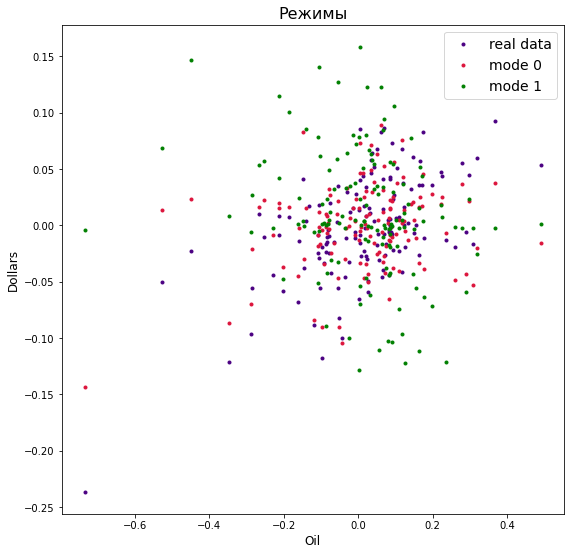

In [364]:
img_data = df.copy()
xx_0_aic_1, xx_1_aic_1 = get_aic_model_6(opt_params_aic_6, U, Z, dU, dZ)[1:]
plt.figure(figsize=(9, 9))
plt.scatter(dU, dZ, c='indigo', label = 'real data', marker='.')
plt.scatter(dU[1:], xx_0_aic_1, c='crimson', label = 'mode 0', marker='.')

plt.scatter(dU[1:], xx_1_aic_1, c='green', label = 'mode 1', marker='.')
plt.xlabel('Oil', fontsize=12)
plt.ylabel('Dollars', fontsize=12)
plt.title("Режимы", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [365]:
U.shape

(137,)

In [366]:
Z.shape

(137,)

In [367]:
Z1

,ND
0,-1.851069
1,-1.835388
2,-1.924173
3,-1.889016
4,-1.908192
...,...
132,-2.141289
133,-2.125341
134,-2.171098
135,-2.166651


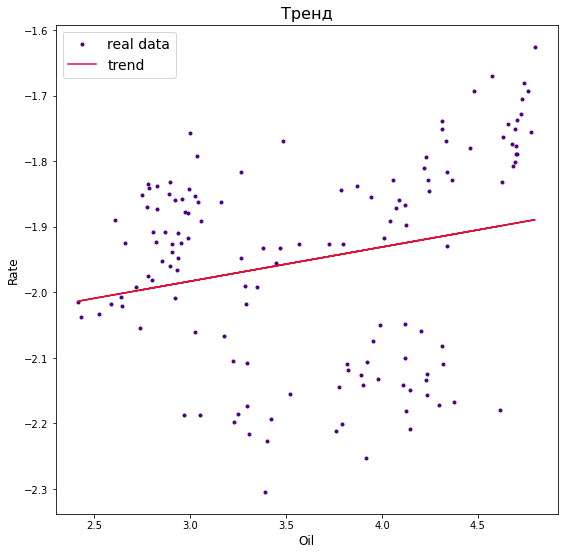

In [368]:
img_data = df.copy()
a_aic_1 = reg.coef_
b_aic_1 = reg.intercept_
plt.figure(figsize=(9, 9))
plt.scatter(U1, Z1, c='indigo', label = 'real data', marker='.')
plt.plot(U1, (a_aic_1 * U1 + b_aic_1), c='crimson', label = 'trend')

plt.xlabel('Oil', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title("Тренд", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [369]:
df

,ND,OD,dND,dOD
DATE,,,,
1988-01-01,-1.851069,2.750811,0.017507,-0.132063
1988-04-01,-1.835388,2.780671,0.015681,0.029860
1988-07-01,-1.924173,2.662133,-0.088786,-0.118538
1988-10-01,-1.889016,2.607885,0.035157,-0.054249
1989-01-01,-1.908192,2.867807,-0.019175,0.259923
...,...,...,...,...
2021-01-01,-2.141289,4.111509,0.059363,0.320152
2021-04-01,-2.125341,4.233843,0.015948,0.122334
2021-07-01,-2.171098,4.297409,-0.045758,0.063566


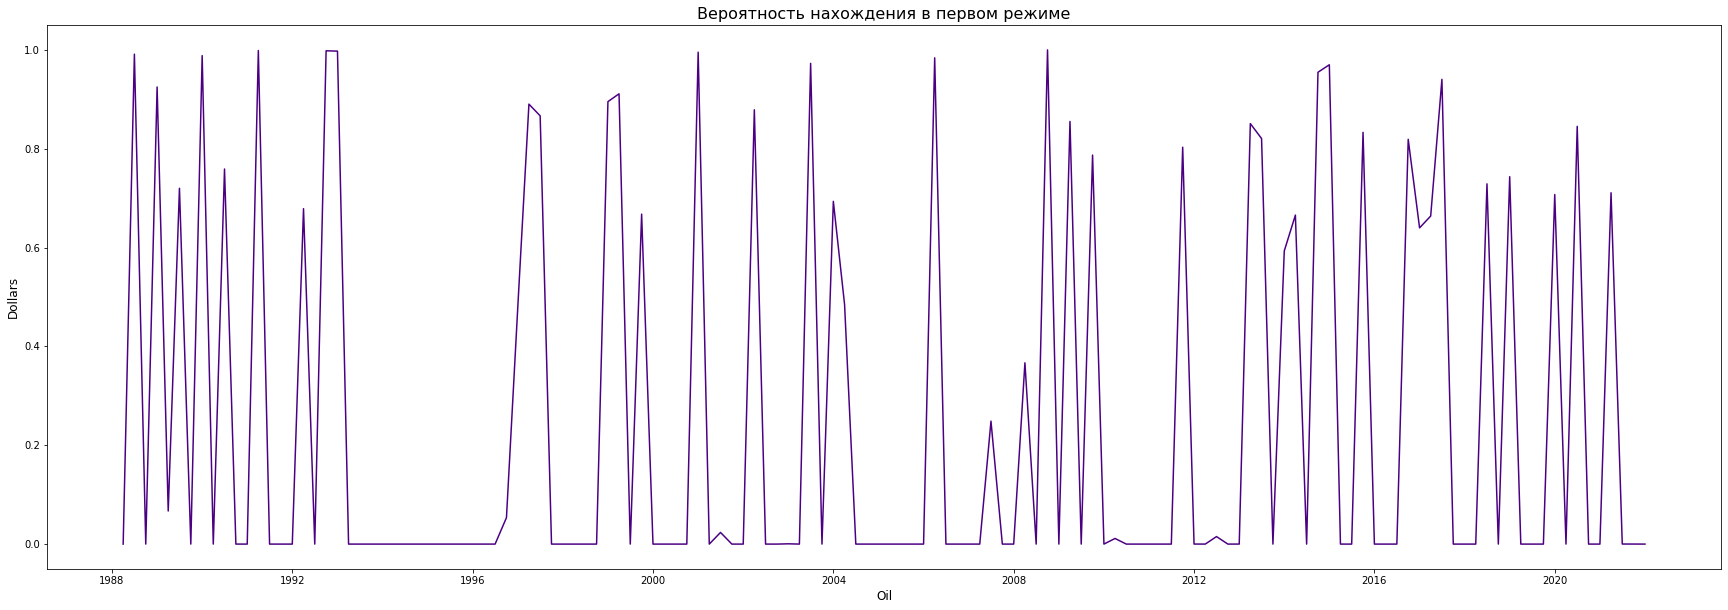

In [370]:
p1_values_aic_1 = model_aic_6(opt_params_aic_6, U, Z, dU, dZ)[:, 1]

img_data = df.copy()

plt.figure(figsize=(30, 10))

plt.plot(img_data.index[1:], p1_values_aic_1, c='indigo')
plt.xlabel('Oil', fontsize=12)
plt.ylabel('Dollars', fontsize=12)
plt.title("Вероятность нахождения в первом режиме", fontsize=16)
plt.show()

In [ ]:
# проверка гипотезы равенства трендов

In [461]:
df_ab_0=df_res_aic_5.loc[df_res_aic_5.fun.idxmin()]

In [462]:
df_ab_0

fun            -311.90078
success              True
a                0.168022
b               -2.691073
alpha_0         -0.037421
c_0              0.110343
f_0               0.18458
n_0               0.23875
e_0             -0.024672
g_0             -0.053051
h_0             -0.093124
k_0               -0.0389
m_0              0.033624
alpha_1           0.14755
c_1               0.25434
d_1              0.213294
n_1             -0.081078
q_1             -0.833058
w_1              0.266771
e_1              0.049681
h_1              0.042962
k_1               0.15301
m_1              0.091037
p_01             0.288266
p_10             0.791726
sigma_0          0.025094
sigma_1          0.004273
a_init           0.164279
b_init          -2.679885
alpha_0_init    -0.037477
c_0_init         0.108929
f_0_init         0.186173
n_0_init         0.233393
e_0_init        -0.023544
g_0_init        -0.051583
h_0_init        -0.093114
k_0_init        -0.035426
m_0_init         0.030319
alpha_1_init

In [463]:
df_ab_1=df_ab_0.head(4)
df_ab_1

fun       -311.90078
success         True
a           0.168022
b          -2.691073
Name: 0, dtype: object

In [464]:
df_ab_2=df_ab_0[4:52]


In [465]:
ser

xi     0.898186
eta    0.553199
dtype: float64

In [466]:
dict = {'xi': np.random.uniform(-1,1),
        'eta': np.random.uniform(-1,1)}
ser = pd.Series(dict)

In [467]:
su=pd.concat([df_ab_1,ser])

In [468]:
df_ab=pd.concat([su, df_ab_2])

In [469]:
df_ab

fun            -311.90078
success              True
a                0.168022
b               -2.691073
xi               0.187629
eta             -0.098401
alpha_0         -0.037421
c_0              0.110343
f_0               0.18458
n_0               0.23875
e_0             -0.024672
g_0             -0.053051
h_0             -0.093124
k_0               -0.0389
m_0              0.033624
alpha_1           0.14755
c_1               0.25434
d_1              0.213294
n_1             -0.081078
q_1             -0.833058
w_1              0.266771
e_1              0.049681
h_1              0.042962
k_1               0.15301
m_1              0.091037
p_01             0.288266
p_10             0.791726
sigma_0          0.025094
sigma_1          0.004273
a_init           0.164279
b_init          -2.679885
alpha_0_init    -0.037477
c_0_init         0.108929
f_0_init         0.186173
n_0_init         0.233393
e_0_init        -0.023544
g_0_init        -0.051583
h_0_init        -0.093114
k_0_init    

In [470]:
elem_pos_ab = [*range(2, 29, 1)]
df_ab_init = df_ab.take(elem_pos_ab)

df_ab_init

a          0.168022
b         -2.691073
xi         0.187629
eta       -0.098401
alpha_0   -0.037421
c_0        0.110343
f_0         0.18458
n_0         0.23875
e_0       -0.024672
g_0       -0.053051
h_0       -0.093124
k_0         -0.0389
m_0        0.033624
alpha_1     0.14755
c_1         0.25434
d_1        0.213294
n_1       -0.081078
q_1       -0.833058
w_1        0.266771
e_1        0.049681
h_1        0.042962
k_1         0.15301
m_1        0.091037
p_01       0.288266
p_10       0.791726
sigma_0    0.025094
sigma_1    0.004273
dtype: object

In [471]:
def model_aic_ab(coefs, u, z, du, dz):
    
    a, b, xi, eta, alpha_0, c_0, f_0, n_0, e_0, g_0,h_0,k_0,m_0, alpha_1, c_1, d_1,n_1, q_1,w_1,e_1,h_1,k_1,m_1, p_01, p_10, sigma_0, sigma_1 = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    xx_0 = dz[1:] - (alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + 
                    c_0 * du[1:] + 
                     #d_0 * prev_dz[1:] + 
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     #q_0*prev_dz4[1:] +
                     #w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    )
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
    
   
    xx_1 = dz[1:] - (alpha_1 * ((a + xi)* prev_u[1:] + (b + eta) - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+
                     #g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + 
                    k_1 * prev_du4[1:]
                     + m_1 * prev_du5[1:]) 
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 

        like_func[i] = f0[i] * p0 + f1[i] * p1
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_ab(coefs, u, z, du, dz):
    res = model_aic_ab(coefs, u, z, du, dz)[:, 0]
    return -np.log(res).sum()

In [472]:
data_bounds_aic_ab= {
    'a': (0, 2), 
    'b': (-4, 0), 
    'xi': (-1, 1),     
    'eta': (-1, 1), 
    'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    #'q_0': (-1, 1),
    #'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    #'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_ab = ['a', 'b','xi', 'eta',
                   'alpha_0',
                   'c_0',
                  #'d_0',
                  'f_0',
                  'n_0',
                  #'q_0',
                  #'w_0',
                  'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1',
                  #'g_1',
                  'h_1',
                  'k_1',
                  'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_ab = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),(-1, 1),(-1, 1), 
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), 
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [473]:
n_loops = 500

df_res_aic_ab = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_ab + [x + '_init' for x in all_vars_aic_ab])

for colum in ['fun'] + all_vars_aic_ab + [x + '_init' for x in all_vars_aic_ab]:
    df_res_aic_ab[colum] = df_res_aic_ab[colum].map(float)

In [474]:
max_iter = 100000

for i in tqdm(range(n_loops)):
    
    #init_data = [np.random.uniform(*data_bounds_aic_ab[x]) for x in all_vars_aic_ab]
    init_data = df_ab_init
    current_res = opt.minimize(log_model_aic_ab,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_ab,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_ab.loc[i, 'fun'] = current_res.fun
    df_res_aic_ab.loc[i, 'success'] = current_res.success
    df_res_aic_ab.loc[i, all_vars_aic_ab] = current_res.x
    df_res_aic_ab.loc[i, [x + '_init' for x in all_vars_aic_ab]] = init_data

In [475]:
def hess_model_aic_ab(arr):
    return log_model_aic_ab(arr, U, Z, dU, dZ)

alpha = 0.05

#init_data = [np.random.uniform(*data_bounds_aic_ab[x]) for x in all_vars_aic_ab]
init_data = df_ab_init

max_iter = 100000

cur_res = opt.minimize(log_model_aic_ab,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_ab,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_ab, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

In [476]:
print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_ab)), dtype='float')

for i in range(len(all_vars_aic_ab)):
    rez.loc[i, 'variable'] = all_vars_aic_ab[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)

Log Likelihood =  312.01011677637837


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.2353,0.1097,0.4504,0.0203,3.20%
1,b,-2.9935,0.4507,-2.1100,-3.8769,0.00%
2,xi,-0.0584,0.1091,0.1555,-0.2723,59.25%
3,eta,0.2732,0.4486,1.1523,-0.6060,54.25%
4,alpha_0,-0.0284,0.0111,-0.0066,-0.0503,1.08%
5,c_0,0.1130,0.0120,0.1365,0.0894,0.00%
6,f_0,0.1743,0.0468,0.2660,0.0826,0.02%
7,n_0,0.2433,0.0431,0.3279,0.1588,0.00%
8,e_0,-0.0250,0.0111,-0.0033,-0.0468,2.43%
9,g_0,-0.0538,0.0124,-0.0295,-0.0780,0.00%


Получилось, что p_value для параметров xi, eta значительно превышает 5%, что подтверждает гипотезу о равном тренде.

In [477]:
# xi, eta values

mean_val = cur_res.x[2:4]
cov_val = inv_hess[2:4, 2:4]

print(mean_val, cov_val)

[-0.05841127  0.2731667 ] [[ 0.0119113  -0.04810027]
 [-0.04810027  0.20121104]]


In [478]:
mean_val = np.array([-0.03560459,0.1970788])
cov_val = np.array([[ 0.00967679,-0.03916564], [-0.03916564,0.16559401]])

print(mean_val, cov_val)

[-0.03560459  0.1970788 ] [[ 0.00967679 -0.03916564]
 [-0.03916564  0.16559401]]


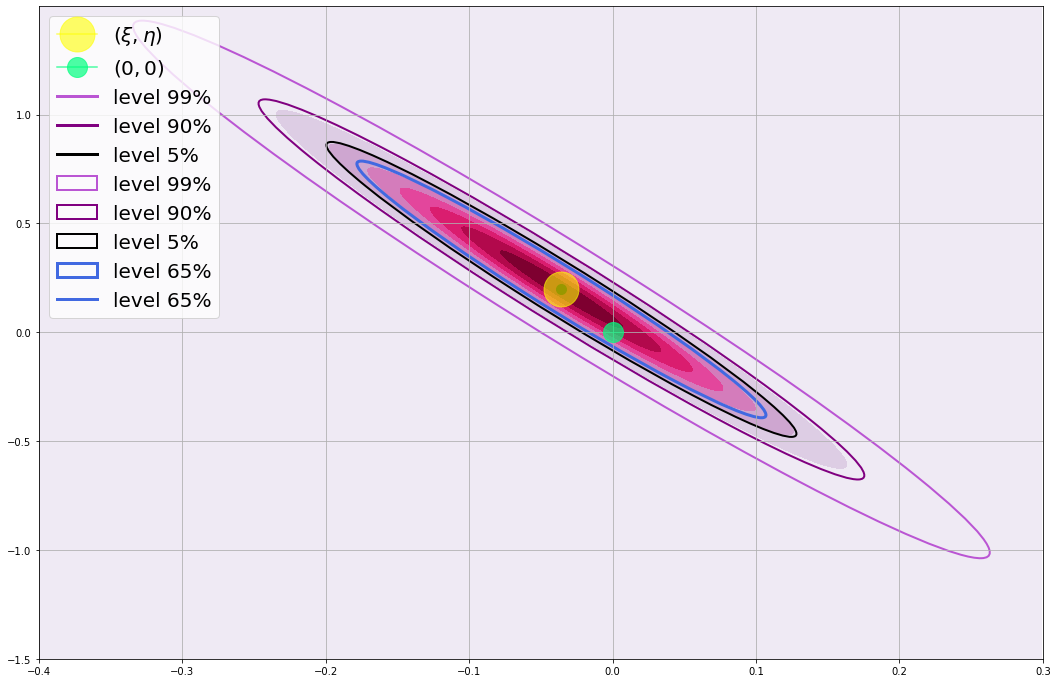

In [742]:
figure = plt.figure(figsize = (18, 12))
ax = figure.add_subplot(1, 1, 1)

#определяем шаг, для построения сетки
x_min = -0.4
x_max = 0.3
y_min = -1.5
y_max = 1.5
step_1 = (x_max - x_min)/1000
step_2 = (y_max - y_min)/1000

#сетка
x, y = np.mgrid[x_min : x_max : step_1, y_min : y_max : step_2]

grid = np.zeros(x.shape + (2,))
grid[:, :, 0] = x
grid[:, :, 1] = y

rv = sp.multivariate_normal(mean = mean_val, cov = cov_val)
ax.contourf(x, y, rv.pdf(grid), cmap = 'PuRd')
#ax.contour(mean_val[0], mean_val[1], levels = 20)

ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'black', markersize = 10)
ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'yellow', markersize = 35, alpha = 0.6, label = "$(\\xi, \\eta)$")
ax.plot(0, 0, marker = 'o', color = 'springgreen', markersize = 20, alpha = 0.7, label = "$(0, 0)$")

ellipse_colors = ['mediumorchid', 'purple', 'black']
ellipse_names = ['level 99%', 'level 90%', 'level 5%']
ells = [] 

plt.axvline(x=-10, label = ellipse_names[0], color = ellipse_colors[0], lw=3)
plt.axvline(x=-20, label = ellipse_names[1], color = ellipse_colors[1], lw=3)
plt.axvline(x=-30, label = ellipse_names[2], color = ellipse_colors[2], lw=3)
plt.xlim(x_min, x_max )

for i, q in enumerate([0.99, 0.9, 0.75]):
    
    # chi^2 func (sum of gaussian values)
    chi2 = -2 * np.log(1-q)
    
    cov = np.matrix(cov_val * chi2, dtype = 'float')
    
    # собственные значения
    e_values = np.linalg.eigh(cov)[0]
    order = e_values.argsort()[::-1]
    e_values = e_values[order]
        
    # собственные векторы
    e_vectors = np.linalg.eigh(cov)[1]
    e_vectors = e_vectors[:, order]
    
    theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
    
    w, h = 2 * np.sqrt(e_values)
    
    ellipse = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = ellipse_colors[i],
                      label = ellipse_names[i], lw = 2)
    ellipse.set_facecolor('none')
    ax.add_artist(ellipse)
    #ells.append(ellipse)
    #ellipse.set(clip_box=ax.bbox, alpha=0.5, facecolor=(0, 1, 1))
    
level = 0.65
    
chi2 = -2 * np.log(1 - level)
ax = plt.subplot(1, 1, 1)

cov = np.matrix(cov_val * chi2, dtype='float')
# собственные значения
e_values = np.linalg.eigh(cov)[0]
order = e_values.argsort()[::-1]
e_values = e_values[order]
        
# собственные векторы
e_vectors = np.linalg.eigh(cov)[1]
e_vectors = e_vectors[:, order]

theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
w, h = 2 * np.sqrt(e_values)

ell = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = 'royalblue', 
              lw = 3)
ell.set_facecolor('none')
ell.set(label = 'level 65%')
ax.add_artist(ell)

plt.axvline(x=-40, label = 'level 65%', color = 'royalblue', lw=3)

ax.legend(ells, ['Ellipse{}'.format(i+1) for i in range(3)])

ax.grid()
ax.legend(fontsize=20)
plt.show()


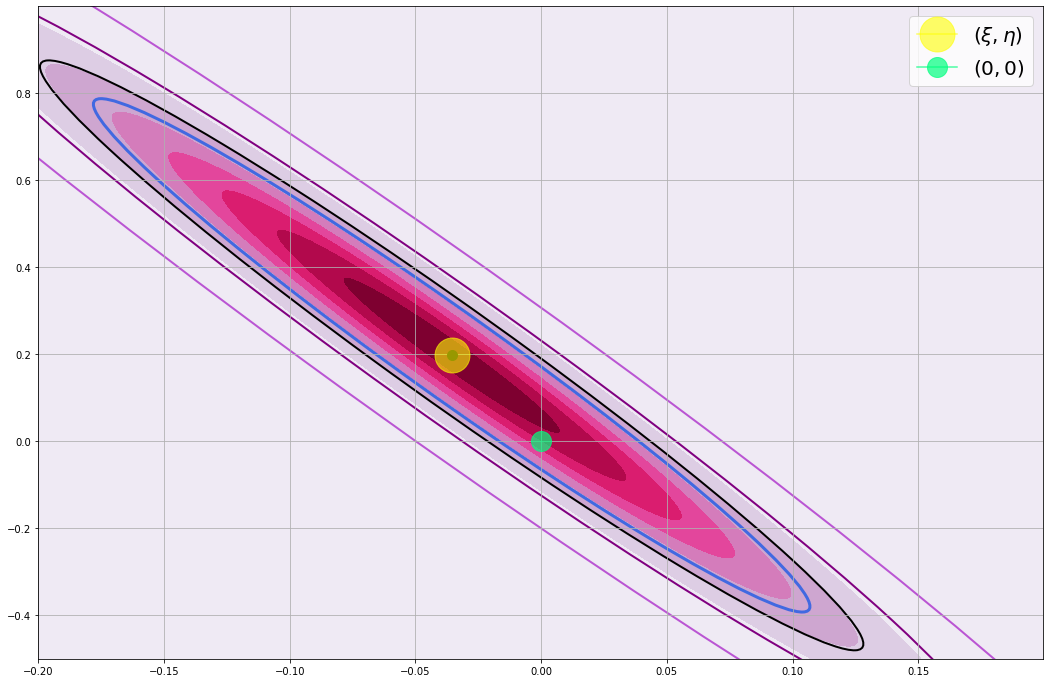

In [480]:
figure = plt.figure(figsize = (18, 12))
ax = figure.add_subplot(1, 1, 1)

#определяем шаг, для построения сетки
x_min = -0.2
x_max = 0.2
y_min = -0.5
y_max = 1.0
step_1 = (x_max - x_min)/1000
step_2 = (y_max - y_min)/1000

#сетка
x, y = np.mgrid[x_min : x_max : step_1, y_min : y_max : step_2]

grid = np.zeros(x.shape + (2,))
grid[:, :, 0] = x
grid[:, :, 1] = y

rv = sp.multivariate_normal(mean = mean_val, cov = cov_val)
ax.contourf(x, y, rv.pdf(grid), cmap = 'PuRd')
#ax.contour(mean_val[0], mean_val[1], levels = 20)

ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'black', markersize = 10)
ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'yellow', markersize = 35, alpha = 0.6, label = "$(\\xi, \\eta)$")
ax.plot(0, 0, marker = 'o', color = 'springgreen', markersize = 20, alpha = 0.7, label = "$(0, 0)$")

ellipse_colors = ['mediumorchid', 'purple', 'black']

for i, q in enumerate([0.99, 0.9, 0.75]):
    
    # chi^2 func (sum of gaussian values)
    chi2 = -2 * np.log(1-q)
    
    cov = np.matrix(cov_val * chi2, dtype = 'float')
    
    # собственные значения
    e_values = np.linalg.eigh(cov)[0]
    order = e_values.argsort()[::-1]
    e_values = e_values[order]
        
    # собственные векторы
    e_vectors = np.linalg.eigh(cov)[1]
    e_vectors = e_vectors[:, order]
    
    theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
    
    w, h = 2 * np.sqrt(e_values)
    
    ellipse = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = ellipse_colors[i], lw = 2)
    ellipse.set_facecolor('none')
    ax.add_artist(ellipse)
    
level = 0.65
    
chi2 = -2 * np.log(1 - level)
ax = plt.subplot(1, 1, 1)

cov = np.matrix(cov_val * chi2, dtype='float')
# собственные значения
e_values = np.linalg.eigh(cov)[0]
order = e_values.argsort()[::-1]
e_values = e_values[order]
        
# собственные векторы
e_vectors = np.linalg.eigh(cov)[1]
e_vectors = e_vectors[:, order]

theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
w, h = 2 * np.sqrt(e_values)

ell = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = 'royalblue', lw = 3)
ell.set_facecolor('none')
ax.add_artist(ell)

ax.grid()
ax.legend(fontsize=20)

In [482]:
#Итак, гипотеза о едином тренде не отвергается на 90-% уровне значимости (level = 0.90).

In [483]:
df_ab_0

fun            -311.90078
success              True
a                0.168022
b               -2.691073
alpha_0         -0.037421
c_0              0.110343
f_0               0.18458
n_0               0.23875
e_0             -0.024672
g_0             -0.053051
h_0             -0.093124
k_0               -0.0389
m_0              0.033624
alpha_1           0.14755
c_1               0.25434
d_1              0.213294
n_1             -0.081078
q_1             -0.833058
w_1              0.266771
e_1              0.049681
h_1              0.042962
k_1               0.15301
m_1              0.091037
p_01             0.288266
p_10             0.791726
sigma_0          0.025094
sigma_1          0.004273
a_init           0.164279
b_init          -2.679885
alpha_0_init    -0.037477
c_0_init         0.108929
f_0_init         0.186173
n_0_init         0.233393
e_0_init        -0.023544
g_0_init        -0.051583
h_0_init        -0.093114
k_0_init        -0.035426
m_0_init         0.030319
alpha_1_init

In [484]:
curr_df = df.copy()
months = np.arange(1, 408)

# так как в таблице данные были прологарифмированы
real_oil = np.exp(curr_df.OD)   

#прологарифмированная цена нефти, увеличенной на 10%
#u_plus10 = np.log(real_oil + 0.1 * real_oil)  
u_plus10 = np.full_like(real_oil, 0)
#u_plus10[0] = U[-1] 
u_plus10[0] = (0 - b) / a # по тренду
u_plus10[1] = np.log(np.exp(u_plus10[0]) * 1.1)
du_plus10 = np.full_like(u_plus10, 0)
du_plus10[1] = u_plus10[1] - u_plus10[0]

In [485]:
u_plus10[0]

16.016194307888252

In [486]:
u_plus10[1]

16.111504487692578

In [487]:
du_plus10

array([0.        , 0.09531018, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [488]:
du_plus10[1]

0.09531017980432566

In [489]:
curr_df = df.copy()
months = np.arange(1,200)

# так как в таблице данные были прологарифмированы
real_oil = np.exp(curr_df.OD)   

a          =0.168022
b         =-2.691073

alpha_0   =-0.037421

c_0       = 0.110343
f_0        = 0.18458
n_0        = 0.23875
e_0       =-0.024672
g_0       =-0.053051
h_0       =-0.093124
k_0        = -0.0389
m_0        =0.033624
alpha_1     =0.14755
c_1         =0.25434
d_1        =0.213294
n_1      = -0.081078
q_1       =-0.833058
w_1        =0.266771
e_1        =0.049681
h_1        =0.042962
k_1         =0.15301
m_1        =0.091037
p_01       =0.288266
p_10       =0.791726
sigma_0    =0.025094
sigma_1    =0.004273

#прологарифмированная цена нефти, увеличенной на 10%
#u_plus10 = np.log(real_oil + 0.1 * real_oil)  
u_plus10 = np.full_like(real_oil, 0)
#u_plus10[0] = U[-1] 
#u_plus10[0] = (0 - b) / a # по тренду

u_plus10[0] = 0
u_plus10[1] = np.log(1.1)
u_plus10[-5:0]=0
u_plus10[1:200]=np.log(1.1)

#u_plus10[1] = np.log(np.exp(u_plus10[0]) * 1.1)
du_plus10 = np.full_like(u_plus10, 0)
du_plus10[1] = u_plus10[1] - u_plus10[0]
du_plus10_prev = np.full_like(u_plus10, 0)
du_plus10_prev[2] = u_plus10[1] - u_plus10[0]
du_plus10_prev2 = np.full_like(u_plus10, 0)
du_plus10_prev2[3] = u_plus10[1] - u_plus10[0]
du_plus10_prev3 = np.full_like(u_plus10, 0)
du_plus10_prev3[4] = u_plus10[1] - u_plus10[0]
du_plus10_prev4 = np.full_like(u_plus10, 0)
du_plus10_prev4[5] = u_plus10[1] - u_plus10[0]
du_plus10_prev5 = np.full_like(u_plus10, 0)
du_plus10_prev5[6] = u_plus10[1] - u_plus10[0]


z_mode0[0] = b
z_mode0[-5:0]=b

z_mode1[0] =b
z_mode1[-5:0]=b


dz_mode0 = dZ.copy()
dz_mode1 = dZ.copy()

d2z_0 = np.full_like(dZ, 0)
d2z_0[2:] = dZ[0:-2]
d2z_1 = np.full_like(dZ, 0)
d2z_1[2:] = dZ[0:-2]

d3z_0 = np.full_like(dZ, 0)
d3z_0[3:] = dZ[0:-3]
d3z_1 = np.full_like(dZ, 0)
d3z_1[3:] = dZ[0:-3]

d4z_0 = np.full_like(dZ, 0)
d4z_0[4:] = dZ[0:-4]
d4z_1 = np.full_like(dZ, 0)
d4z_1[4:] = dZ[0:-4]

d5z_0 = np.full_like(dZ, 0)
d5z_0[5:] = dZ[0:-5]
d5z_1 = np.full_like(dZ, 0)
d5z_1[5:] = dZ[0:-5]


dz_mode0[1] = (alpha_0 * (a * u_plus10[0] + b - z_mode0[0])+ c_0 *du_plus10[1]+ 
                     f_0 * d2z_0[0]+ 
                     n_0 * d3z_0[0]+
                     e_0 * du_plus10_prev[1]+
                     g_0 * du_plus10_prev2[1]+
                     h_0 * du_plus10_prev3[1]+
                     k_0 * du_plus10_prev4[1]+
                     m_0 * du_plus10_prev5[1]
                    )
print('mode0=',dz_mode0[1])
dz_mode1[1] = (alpha_1 * (a * u_plus10[0]+ b - z_mode1[0])+ c_1 * du_plus10[1]+ d_1 * dz_mode1[0]+
                    n_1 * d3z_1[0]+
                    q_1 * d4z_1[0]+
                    w_1 * d5z_1[0]+
                    e_1 * du_plus10_prev[1]+
                    h_1 * du_plus10_prev3[1]+
                    k_1 * du_plus10_prev4[1]+
                    m_1 * du_plus10_prev5[1]) 
print('mode1=',dz_mode1[1])    
z_mode0[1] = z_mode0[0] + dz_mode0[1]
z_mode1[1] = z_mode1[0] + dz_mode1[1]

for i in range(2, 137):   
    dz_mode0[i] = (alpha_0 * (a * u_plus10[i-1] + b - z_mode0[i-1])+ c_0 *du_plus10[i]+ 
                     f_0 * d2z_0[i]+ 
                     n_0 * d3z_0[i]+
                     e_0 * du_plus10_prev[i]+
                     g_0 * du_plus10_prev2[i]+
                     h_0 * du_plus10_prev3[i]+
                     k_0 * du_plus10_prev4[i]+
                     m_0 * du_plus10_prev5[i])
         
    dz_mode1[i] = (alpha_1 * (a * u_plus10[i-1]+ b - z_mode1[i-1])+ c_1 * du_plus10[i]+ d_1 * dz_mode1[i-1]+
                    n_1 * d3z_1[i]+
                    q_1 * d4z_1[i]+
                    w_1 * d5z_1[i]+
                    e_1 * du_plus10_prev[i]+
                    h_1 * du_plus10_prev3[i]+
                    k_1 * du_plus10_prev4[i]+
                    m_1 * du_plus10_prev5[i]) 
    
    z_mode0[i] = z_mode0[i-1] + dz_mode0[i]
    z_mode1[i] = z_mode1[i-1] + dz_mode1[i]
    
    #update values
    d2z_0[2:] = dz_mode0[0:-2]
    d2z_1[2:] = dz_mode1[0:-2]
    d3z_0[3:] = dz_mode0[0:-3]
    d3z_1[3:] = dz_mode1[0:-3]
    d4z_0[4:] = dz_mode0[0:-4]
    d4z_1[4:] = dz_mode1[0:-4]
    d5z_0[5:] = dz_mode0[0:-5]
    d5z_1[5:] = dz_mode1[0:-5]

mode0= 0.010516811170148625
mode1= 0.027975386060128116


In [490]:
impulse_0_real = np.exp(z_mode0)
impulse_1_real = np.exp(z_mode1)

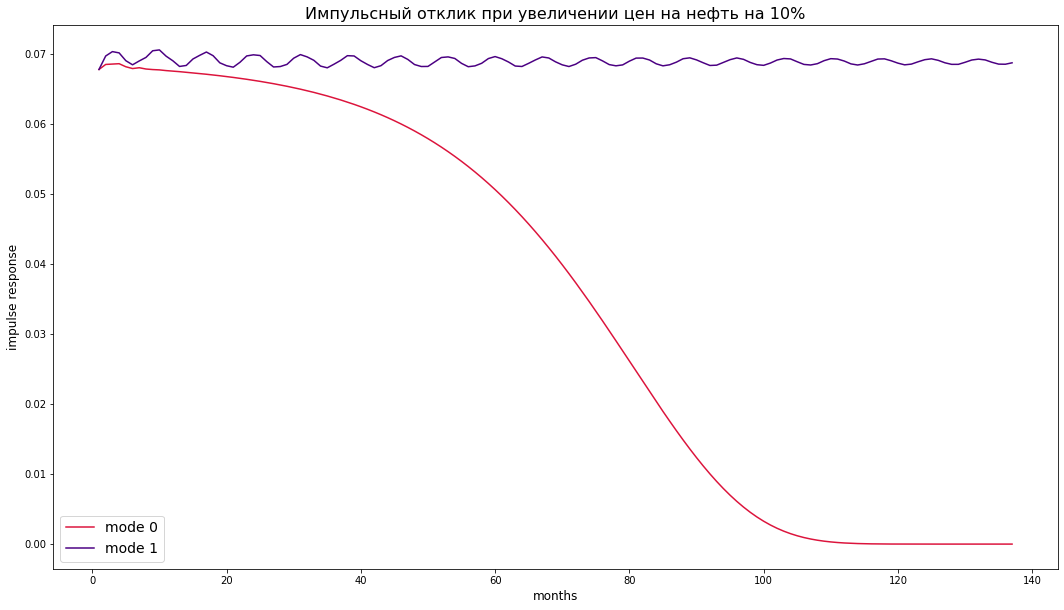

In [492]:
impulse_0 = np.exp(z_mode0)
impulse_1 = np.exp(z_mode1)

plt.figure(figsize=(18, 10))
plt.plot(months[0:137], impulse_0[0:137], c='crimson', label = 'mode 0', lw = 1.5)
plt.plot(months[0:137], impulse_1[0:137], c='indigo', label = 'mode 1', lw = 1.5)

plt.xlabel('months', fontsize=12)
plt.ylabel('impulse response', fontsize=12)
plt.title("Импульсный отклик при увеличении цен на нефть на 10%", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [502]:
df_ab_1=df_res_aic_6.loc[df_res_aic_6.fun.idxmin()]

In [503]:
df_ab_1

fun            -308.464278
success              False
a                 0.181747
b                -2.739289
c_0               0.113244
f_0               0.164108
n_0                0.25495
e_0              -0.018441
g_0              -0.050346
h_0              -0.093623
k_0              -0.045705
m_0               0.040211
alpha_1           0.142789
c_1               0.259075
d_1               0.200034
n_1              -0.082197
q_1              -0.829358
w_1               0.286503
e_1               0.053197
h_1               0.041682
k_1               0.155826
m_1               0.084322
p_01              0.276428
p_10              0.813248
sigma_0           0.026757
sigma_1           0.003764
a_init            0.168022
b_init           -2.691073
c_0_init          0.110343
f_0_init           0.18458
n_0_init           0.23875
e_0_init         -0.024672
g_0_init         -0.053051
h_0_init         -0.093124
k_0_init           -0.0389
m_0_init          0.033624
alpha_1_init       0.14755
c

In [504]:
df_ab_2=df_ab_1.head(4)
df_ab_2

fun       -308.464278
success         False
a            0.181747
b           -2.739289
Name: 0, dtype: object

In [505]:
df_ab_3=df_ab_1[4:52]


In [506]:
dict = {'xi': np.random.uniform(-1,1),
        'eta': np.random.uniform(-1,1)}
sr = pd.Series(dict)

In [507]:
sup=pd.concat([df_ab_2,sr])

In [508]:
df_ab_3=pd.concat([sup, df_ab_3])

In [509]:
df_ab_3

fun            -308.464278
success              False
a                 0.181747
b                -2.739289
xi                0.276442
eta              -0.669613
c_0               0.113244
f_0               0.164108
n_0                0.25495
e_0              -0.018441
g_0              -0.050346
h_0              -0.093623
k_0              -0.045705
m_0               0.040211
alpha_1           0.142789
c_1               0.259075
d_1               0.200034
n_1              -0.082197
q_1              -0.829358
w_1               0.286503
e_1               0.053197
h_1               0.041682
k_1               0.155826
m_1               0.084322
p_01              0.276428
p_10              0.813248
sigma_0           0.026757
sigma_1           0.003764
a_init            0.168022
b_init           -2.691073
c_0_init          0.110343
f_0_init           0.18458
n_0_init           0.23875
e_0_init         -0.024672
g_0_init         -0.053051
h_0_init         -0.093124
k_0_init           -0.0389
m

In [512]:
elem_pos_ab_3 = [*range(2, 28, 1)]
df_ab_3_init = df_ab_3.take(elem_pos_ab_3)

df_ab_3_init

a          0.181747
b         -2.739289
xi         0.276442
eta       -0.669613
c_0        0.113244
f_0        0.164108
n_0         0.25495
e_0       -0.018441
g_0       -0.050346
h_0       -0.093623
k_0       -0.045705
m_0        0.040211
alpha_1    0.142789
c_1        0.259075
d_1        0.200034
n_1       -0.082197
q_1       -0.829358
w_1        0.286503
e_1        0.053197
h_1        0.041682
k_1        0.155826
m_1        0.084322
p_01       0.276428
p_10       0.813248
sigma_0    0.026757
sigma_1    0.003764
dtype: object

In [513]:
def model_aic_abc(coefs, u, z, du, dz):
    
    a, b, xi, eta, c_0, f_0, n_0, e_0, g_0,h_0,k_0,m_0, alpha_1, c_1, d_1,n_1, q_1,w_1,e_1,h_1,k_1,m_1, p_01, p_10, sigma_0, sigma_1 = coefs
    
    prev_z = np.zeros_like(z)
    prev_z[1:] = z[0:-1]
    prev_z[0] = 0
    prev_u = np.zeros_like(u)
    prev_u[1:] = u[0:-1]
    prev_u[0] = 0
    prev_dz = np.zeros_like(dz)
    prev_dz[1:] = dz[0:-1]
    prev_dz[0] = 0
    
    prev_dz2 = np.zeros_like(dz)
    prev_dz2[2:] = dz[0:-2]
    prev_dz3 = np.zeros_like(dz)
    prev_dz3[3:] = dz[0:-3]
    prev_dz4 = np.zeros_like(dz)
    prev_dz4[4:] = dz[0:-4]
    prev_dz5 = np.zeros_like(dz)
    prev_dz5[5:] = dz[0:-5]

    prev_du2 = np.zeros_like(du)
    prev_du2[2:] = du[0:-2]
    
    prev_du = np.zeros_like(du)
    prev_du[1:] = du[0:-1]
    #prev_du[0] = 0
    prev_du3 = np.zeros_like(du)
    prev_du3[3:] = du[0:-3]
    
    prev_du4 = np.zeros_like(du)
    prev_du4[4:] = du[0:-4]
    prev_du5 = np.zeros_like(du)
    prev_du5[5:] = du[0:-5]
    
    xx_0 = dz[1:] - (#alpha_0 * (a * prev_u[1:] + b - prev_z[1:]) + 
                     c_0 * du[1:] + 
                     #d_0 * prev_dz[1:] + 
                     f_0 * prev_dz2[1:] + 
                     n_0 * prev_dz3[1:] +
                     #q_0*prev_dz4[1:] +
                     #w_0 * prev_dz5[1:]+
                     e_0 * prev_du[1:] +
                     g_0 * prev_du2[1:] +
                     h_0 * prev_du3[1:]+
                     k_0 * prev_du4[1:]+
                     m_0 * prev_du5[1:]
                    )
    f0 = sp.norm.pdf(xx_0, 0, sigma_0)
    
   
    xx_1 = dz[1:] - (alpha_1 * ((a + xi)* prev_u[1:] + (b + eta) - prev_z[1:]) + c_1 * du[1:]+ d_1 * prev_dz[1:] +
                     #f_1 * prev_dz2[1:] +
                    n_1 * prev_dz3[1:]+
                    q_1 * prev_dz4[1:] + w_1 * prev_dz5[1:] + e_1 * prev_du[1:]+
                     #g_1 * prev_du2[1:]+
                    h_1 * prev_du3[1:] + 
                    k_1 * prev_du4[1:]
                     + m_1 * prev_du5[1:]) 
    f1 = sp.norm.pdf(xx_1, 0, sigma_1)
    all_time = len(u) - 1
    
    like_func = np.zeros(all_time)
    
    #probs
    p = np.zeros(all_time + 1)
    p[0] = p_01 / (p_01 + p_10)

    for i in range(all_time):
        p0 = p_10 * p[i] + (1 - p_01) * (1 - p[i])
        p1 = p_01 * (1 - p[i]) + (1 - p_10) * p[i] 

        like_func[i] = f0[i] * p0 + f1[i] * p1
        p[i + 1] = f1[i] * p1 / like_func[i]
                    
    return np.column_stack([like_func, p[1:]])

def log_model_aic_abc(coefs, u, z, du, dz):
    res = model_aic_abc(coefs, u, z, du, dz)[:, 0]
    return -np.log(res).sum()

In [568]:
data_bounds_aic_abc= {
    'a': (0, 2), 
    'b': (-4, 0), 
    'xi': (-1, 1),     
    'eta': (-1, 1), 
    #'alpha_0': (-1, 1), 
    'c_0': (-1, 1),
    #'d_0': (-1, 1),
    'f_0': (-1, 1),
    'n_0': (-1, 1),
    #'q_0': (-1, 1),
    #'w_0': (-1, 1),    
    'e_0': (-1, 1),
    'g_0': (-1, 1),
    'h_0': (-1, 1),
    'k_0': (-1, 1),
    'm_0': (-1, 1),
    
    'alpha_1': (0, 1), 
    'c_1': (-1, 1),
    'd_1': (-1, 1),
    #'f_1': (-1, 1),
    'n_1': (-1, 1),
    'q_1': (-1, 1),
    'w_1': (-1, 1),
    'e_1': (-1, 1),
    #'g_1': (-1, 1),
    'h_1': (-1, 1),
    'k_1': (-1, 1),
    'm_1': (-1, 1),

    'p_01': (0, 1), 
    'p_10': (0, 1), 

    'sigma_0': (0.001, 0.3),
    'sigma_1': (0.001, 0.3)
}

all_vars_aic_abc = ['a', 'b','xi', 'eta',
                   #'alpha_0',
                   'c_0',
                  #'d_0',
                  'f_0',
                  'n_0',
                  #'q_0',
                  #'w_0',
                  'e_0',
                  'g_0',
                  'h_0',
                  'k_0',
                  'm_0', 'alpha_1', 'c_1', 'd_1',
                  #'f_1',
                  'n_1','q_1','w_1','e_1',
                  #'g_1',
                  'h_1',
                  'k_1',
                  'm_1','p_01', 'p_10', 'sigma_0', 'sigma_1']


all_bounds_aic_abc = ((0, 2), (-4, 0), 
              (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1),(-1, 1),
              (0, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), 
              (0, 1), (0, 1), 
              (0.001, 0.3), (0.001, 0.3))

In [569]:
n_loops = 500

df_res_aic_abc = pd.DataFrame(index = range(n_loops), columns=['fun', 'success'] + all_vars_aic_abc + [x + '_init' for x in all_vars_aic_abc])

for colum in ['fun'] + all_vars_aic_abc + [x + '_init' for x in all_vars_aic_abc]:
    df_res_aic_abc[colum] = df_res_aic_abc[colum].map(float)

In [518]:
max_iter = 100000

for i in tqdm(range(n_loops)):
    
    #init_data = [np.random.uniform(*data_bounds_aic_ab[x]) for x in all_vars_aic_ab]
    init_data = df_ab_3_init
    current_res = opt.minimize(log_model_aic_abc,
                            init_data,
                            args = (U, Z, dU, dZ),
                            method='L-BFGS-B', jac=False,
                            bounds=all_bounds_aic_abc,
                            options={'maxiter': max_iter}, 
                            tol = 10**(-20))

    df_res_aic_abc.loc[i, 'fun'] = current_res.fun
    df_res_aic_abc.loc[i, 'success'] = current_res.success
    df_res_aic_abc.loc[i, all_vars_aic_abc] = current_res.x
    df_res_aic_abc.loc[i, [x + '_init' for x in all_vars_aic_abc]] = init_data

In [519]:
def hess_model_aic_abc(arr):
    return log_model_aic_abc(arr, U, Z, dU, dZ)

alpha = 0.05

#init_data = [np.random.uniform(*data_bounds_aic_ab[x]) for x in all_vars_aic_ab]
init_data = df_ab_3_init

max_iter = 100000

cur_res = opt.minimize(log_model_aic_abc,
                        init_data,
                        args = (U, Z, dU, dZ),
                        method = 'L-BFGS-B', jac=False, tol=10**(-30),
                        bounds = all_bounds_aic_abc,
                        options = {'maxiter': max_iter})

estimations = np.array(cur_res.x, dtype='float')

res_hess = hessian2(estimations, hess_model_aic_abc, 1e-6)
sym_hess = (res_hess + res_hess.T) / 2
inv_hess = np.linalg.inv(sym_hess)

std_errs = np.sqrt(inv_hess.diagonal())

LinAlgError: Singular matrix

In [521]:
print('Log Likelihood = ', - cur_res.fun)

rez = pd.DataFrame(columns=['variable', 'estimation', 'std_err', 'upper confidence interval', 
                            'lower confidence interval', 'p-value'], 
                   index = range(len(all_vars_aic_abc)), dtype='float')

for i in range(len(all_vars_aic_abc)):
    rez.loc[i, 'variable'] = all_vars_aic_abc[i]
    rez.loc[i, 'estimation'] = estimations[i]
    rez.loc[i, 'std_err'] = std_errs[i]
    rez.loc[i, 'lower confidence interval'] = estimations[i] + sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'upper confidence interval'] = estimations[i] - sp.norm.ppf(alpha / 2) * std_errs[i]
    rez.loc[i, 'p-value'] = 1 - sp.norm.cdf(abs(estimations[i] / std_errs[i])) + sp.norm.cdf(- abs(estimations[i] / std_errs[i]))

display(
    rez.style.background_gradient(
        cmap = 'Greens', low = 0, high = 1, subset = 'p-value'
    ).format(
        '{:.4f}', subset=['estimation', 'std_err', 'upper confidence interval', 'lower confidence interval']
    ).format(
        '{:.2%}', subset='p-value'
    )
)

Log Likelihood =  306.8598309246861


,variable,estimation,std_err,upper confidence interval,lower confidence interval,p-value
0,a,0.0524,0.1097,0.2675,-0.1627,63.28%
1,b,-2.4367,0.4507,-1.5532,-3.3201,0.00%
2,xi,0.1417,0.1091,0.3556,-0.0722,19.41%
3,eta,-0.3624,0.4486,0.5168,-1.2416,41.91%
4,c_0,0.1244,0.0111,0.1462,0.1026,0.00%
5,f_0,0.1807,0.0120,0.2043,0.1572,0.00%
6,n_0,0.2768,0.0468,0.3686,0.1851,0.00%
7,e_0,-0.0143,0.0431,0.0703,-0.0988,74.08%
8,g_0,-0.0518,0.0111,-0.0300,-0.0736,0.00%
9,h_0,-0.0975,0.0124,-0.0732,-0.1218,0.00%


In [522]:
# xi, eta values

mean_val = cur_res.x[2:4]
cov_val = inv_hess[2:4, 2:4]

print(mean_val, cov_val)

[ 0.14173464 -0.36240747] [[ 0.0119113  -0.04810027]
 [-0.04810027  0.20121104]]


In [523]:
mean_val = np.array([-0.03560459,0.1970788])
cov_val = np.array([[ 0.00967679,-0.03916564], [-0.03916564,0.16559401]])

print(mean_val, cov_val)

[-0.03560459  0.1970788 ] [[ 0.00967679 -0.03916564]
 [-0.03916564  0.16559401]]


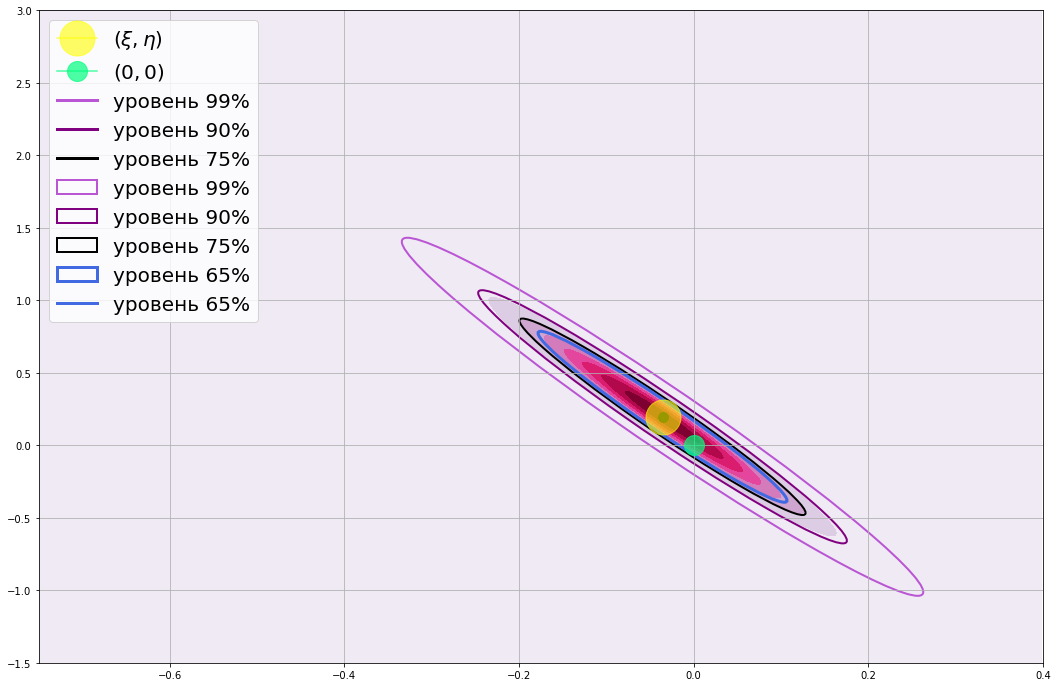

In [524]:
figure = plt.figure(figsize = (18, 12))
ax = figure.add_subplot(1, 1, 1)

#определяем шаг, для построения сетки
x_min = -0.75
x_max = 0.4
y_min = -1.5
y_max = 3.0
step_1 = (x_max - x_min)/1000
step_2 = (y_max - y_min)/1000

#сетка
x, y = np.mgrid[x_min : x_max : step_1, y_min : y_max : step_2]

grid = np.zeros(x.shape + (2,))
grid[:, :, 0] = x
grid[:, :, 1] = y

rv = sp.multivariate_normal(mean = mean_val, cov = cov_val)
ax.contourf(x, y, rv.pdf(grid), cmap = 'PuRd')
#ax.contour(mean_val[0], mean_val[1], levels = 20)

ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'black', markersize = 10)
ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'yellow', markersize = 35, alpha = 0.6, label = "$(\\xi, \\eta)$")
ax.plot(0, 0, marker = 'o', color = 'springgreen', markersize = 20, alpha = 0.7, label = "$(0, 0)$")

ellipse_colors = ['mediumorchid', 'purple', 'black']
ellipse_names = ['уровень 99%', 'уровень 90%', 'уровень 75%']
ells = [] 

plt.axvline(x=-10, label = ellipse_names[0], color = ellipse_colors[0], lw=3)
plt.axvline(x=-20, label = ellipse_names[1], color = ellipse_colors[1], lw=3)
plt.axvline(x=-30, label = ellipse_names[2], color = ellipse_colors[2], lw=3)
plt.xlim(x_min, x_max )

for i, q in enumerate([0.99, 0.9, 0.75]):
    
    # chi^2 func (sum of gaussian values)
    chi2 = -2 * np.log(1-q)
    
    cov = np.matrix(cov_val * chi2, dtype = 'float')
    
    # собственные значения
    e_values = np.linalg.eigh(cov)[0]
    order = e_values.argsort()[::-1]
    e_values = e_values[order]
        
    # собственные векторы
    e_vectors = np.linalg.eigh(cov)[1]
    e_vectors = e_vectors[:, order]
    
    theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
    
    w, h = 2 * np.sqrt(e_values)
    
    ellipse = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = ellipse_colors[i],
                      label = ellipse_names[i], lw = 2)
    ellipse.set_facecolor('none')
    ax.add_artist(ellipse)
    #ells.append(ellipse)
    #ellipse.set(clip_box=ax.bbox, alpha=0.5, facecolor=(0, 1, 1))
    
level = 0.65
    
chi2 = -2 * np.log(1 - level)
ax = plt.subplot(1, 1, 1)

cov = np.matrix(cov_val * chi2, dtype='float')
# собственные значения
e_values = np.linalg.eigh(cov)[0]
order = e_values.argsort()[::-1]
e_values = e_values[order]
        
# собственные векторы
e_vectors = np.linalg.eigh(cov)[1]
e_vectors = e_vectors[:, order]

theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
w, h = 2 * np.sqrt(e_values)

ell = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = 'royalblue', 
              lw = 3)
ell.set_facecolor('none')
ell.set(label = 'уровень 65%')
ax.add_artist(ell)

plt.axvline(x=-40, label = 'уровень 65%', color = 'royalblue', lw=3)

ax.legend(ells, ['Ellipse{}'.format(i+1) for i in range(3)])

ax.grid()
ax.legend(fontsize=20)
plt.show()


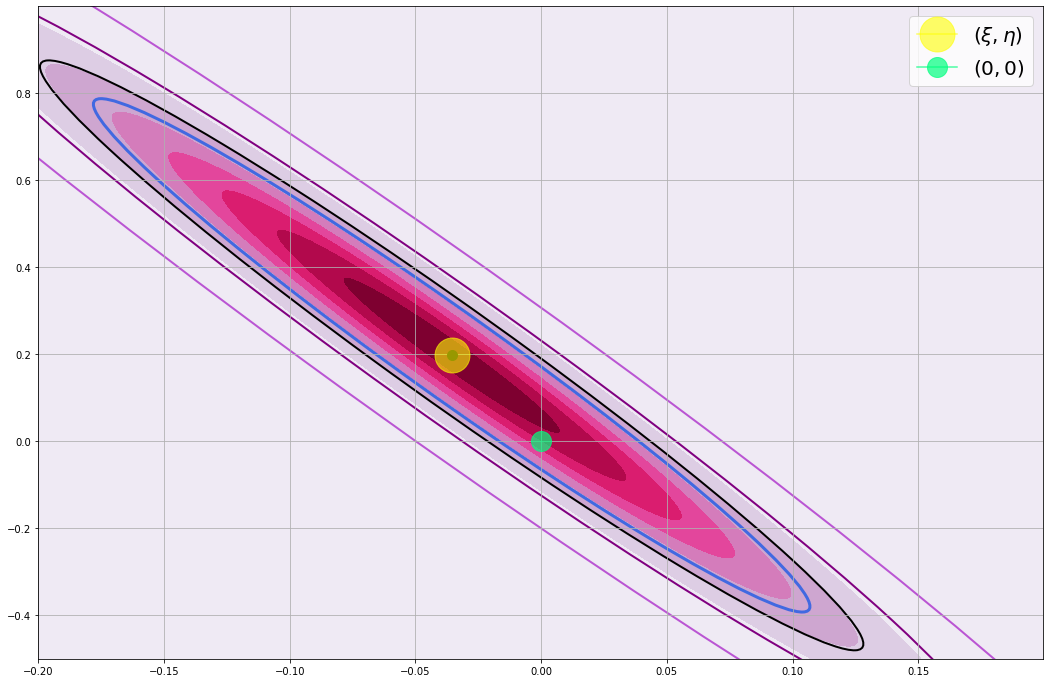

In [525]:
figure = plt.figure(figsize = (18, 12))
ax = figure.add_subplot(1, 1, 1)

#определяем шаг, для построения сетки
x_min = -0.2
x_max = 0.2
y_min = -0.5
y_max = 1.0
step_1 = (x_max - x_min)/1000
step_2 = (y_max - y_min)/1000

#сетка
x, y = np.mgrid[x_min : x_max : step_1, y_min : y_max : step_2]

grid = np.zeros(x.shape + (2,))
grid[:, :, 0] = x
grid[:, :, 1] = y

rv = sp.multivariate_normal(mean = mean_val, cov = cov_val)
ax.contourf(x, y, rv.pdf(grid), cmap = 'PuRd')
#ax.contour(mean_val[0], mean_val[1], levels = 20)

ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'black', markersize = 10)
ax.plot(mean_val[0], mean_val[1], marker = 'o', color = 'yellow', markersize = 35, alpha = 0.6, label = "$(\\xi, \\eta)$")
ax.plot(0, 0, marker = 'o', color = 'springgreen', markersize = 20, alpha = 0.7, label = "$(0, 0)$")

ellipse_colors = ['mediumorchid', 'purple', 'black']

for i, q in enumerate([0.99, 0.9, 0.75]):
    
    # chi^2 func (sum of gaussian values)
    chi2 = -2 * np.log(1-q)
    
    cov = np.matrix(cov_val * chi2, dtype = 'float')
    
    # собственные значения
    e_values = np.linalg.eigh(cov)[0]
    order = e_values.argsort()[::-1]
    e_values = e_values[order]
        
    # собственные векторы
    e_vectors = np.linalg.eigh(cov)[1]
    e_vectors = e_vectors[:, order]
    
    theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
    
    w, h = 2 * np.sqrt(e_values)
    
    ellipse = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = ellipse_colors[i], lw = 2)
    ellipse.set_facecolor('none')
    ax.add_artist(ellipse)
    
level = 0.65
    
chi2 = -2 * np.log(1 - level)
ax = plt.subplot(1, 1, 1)

cov = np.matrix(cov_val * chi2, dtype='float')
# собственные значения
e_values = np.linalg.eigh(cov)[0]
order = e_values.argsort()[::-1]
e_values = e_values[order]
        
# собственные векторы
e_vectors = np.linalg.eigh(cov)[1]
e_vectors = e_vectors[:, order]

theta = np.degrees(np.arctan2(*e_vectors[:,0][::-1]))
w, h = 2 * np.sqrt(e_values)

ell = Ellipse(xy = (mean_val[0], mean_val[1]), width = w, height = h, angle = theta, color = 'royalblue', lw = 3)
ell.set_facecolor('none')
ax.add_artist(ell)

ax.grid()
ax.legend(fontsize=20)

In [526]:
curr_df = df.copy()
months = np.arange(1, 408)

# так как в таблице данные были прологарифмированы
real_oil = np.exp(curr_df.OD)   

#прологарифмированная цена нефти, увеличенной на 10%
#u_plus10 = np.log(real_oil + 0.1 * real_oil)  
u_plus10 = np.full_like(real_oil, 0)
#u_plus10[0] = U[-1] 
u_plus10[0] = (0 - b) / a # по тренду
u_plus10[1] = np.log(np.exp(u_plus10[0]) * 1.1)
du_plus10 = np.full_like(u_plus10, 0)
du_plus10[1] = u_plus10[1] - u_plus10[0]

In [527]:
df_ab_1

fun            -308.464278
success              False
a                 0.181747
b                -2.739289
c_0               0.113244
f_0               0.164108
n_0                0.25495
e_0              -0.018441
g_0              -0.050346
h_0              -0.093623
k_0              -0.045705
m_0               0.040211
alpha_1           0.142789
c_1               0.259075
d_1               0.200034
n_1              -0.082197
q_1              -0.829358
w_1               0.286503
e_1               0.053197
h_1               0.041682
k_1               0.155826
m_1               0.084322
p_01              0.276428
p_10              0.813248
sigma_0           0.026757
sigma_1           0.003764
a_init            0.168022
b_init           -2.691073
c_0_init          0.110343
f_0_init           0.18458
n_0_init           0.23875
e_0_init         -0.024672
g_0_init         -0.053051
h_0_init         -0.093124
k_0_init           -0.0389
m_0_init          0.033624
alpha_1_init       0.14755
c

In [645]:
curr_df = df.copy()
months = np.arange(1,137)

df_mode0 = pd.DataFrame()
df_mode1 = pd.DataFrame()


# так как в таблице данные были прологарифмированы
real_oil = np.exp(curr_df.OD)   

a                 =0.181747
b                =-2.739289
c_0               =0.113244
f_0               =0.164108
n_0                =0.25495
e_0              =-0.018441
g_0              =-0.050346
h_0              =-0.093623
k_0              =-0.045705
m_0               =0.040211
alpha_1           =0.142789
c_1               =0.259075
d_1               =0.200034
n_1              =-0.082197
q_1              =-0.829358
w_1               =0.286503
e_1               =0.053197
h_1               =0.041682
k_1               =0.155826
m_1               =0.084322
p_01              =0.276428
p_10              =0.813248
sigma_0           =0.026757
sigma_1           =0.003764

for j in range(1, 1001):
    #прологарифмированная цена нефти, увеличенной на 10%
    #u_plus10 = np.log(real_oil + 0.1 * real_oil)  
    u_plus10 = np.full_like(real_oil, 0)
    #u_plus10[0] = U[-1] 
    #u_plus10[0] = (0 - b) / a # по тренду

    u_plus10[0] = 0
    u_plus10[1] = np.log(1.1)
    u_plus10[-5:0]=0
    u_plus10[1:200]=np.log(1.1)
    eps_0=np.random.normal(0,1,138)
    #print('eps_0',eps_0)
    #print(eps_0)
    #u_plus10[1] = np.log(np.exp(u_plus10[0]) * 1.1)
    du_plus10 = np.full_like(u_plus10, 0)
    du_plus10[1] = u_plus10[1] - u_plus10[0]
    du_plus10_prev = np.full_like(u_plus10, 0)
    du_plus10_prev[2] = u_plus10[1] - u_plus10[0]
    du_plus10_prev2 = np.full_like(u_plus10, 0)
    du_plus10_prev2[3] = u_plus10[1] - u_plus10[0]
    du_plus10_prev3 = np.full_like(u_plus10, 0)
    du_plus10_prev3[4] = u_plus10[1] - u_plus10[0]
    du_plus10_prev4 = np.full_like(u_plus10, 0)
    du_plus10_prev4[5] = u_plus10[1] - u_plus10[0]
    du_plus10_prev5 = np.full_like(u_plus10, 0)
    du_plus10_prev5[6] = u_plus10[1] - u_plus10[0]


    z_mode0[0] = b
    z_mode0[-5:0]=b

    z_mode1[0] =b
    z_mode1[-5:0]=b


    dz_mode0 = dZ.copy()
    dz_mode1 = dZ.copy()

    d2z_0 = np.full_like(dZ, 0)
    d2z_0[2:] = dZ[0:-2]
    d2z_1 = np.full_like(dZ, 0)
    d2z_1[2:] = dZ[0:-2]

    d3z_0 = np.full_like(dZ, 0)
    d3z_0[3:] = dZ[0:-3]
    d3z_1 = np.full_like(dZ, 0)
    d3z_1[3:] = dZ[0:-3]

    d4z_0 = np.full_like(dZ, 0)
    d4z_0[4:] = dZ[0:-4]
    d4z_1 = np.full_like(dZ, 0)
    d4z_1[4:] = dZ[0:-4]

    d5z_0 = np.full_like(dZ, 0)
    d5z_0[5:] = dZ[0:-5]
    d5z_1 = np.full_like(dZ, 0)
    d5z_1[5:] = dZ[0:-5]

    #print(sigma_0*eps_0[1])
    dz_mode0[1] = (#alpha_0 * (a * u_plus10[0] + b - z_mode0[0])+ 
                    c_0 *du_plus10[1]+ 
                     f_0 * d2z_0[0]+ 
                     n_0 * d3z_0[0]+
                     e_0 * du_plus10_prev[1]+
                     g_0 * du_plus10_prev2[1]+
                     h_0 * du_plus10_prev3[1]+
                     k_0 * du_plus10_prev4[1]+
                     m_0 * du_plus10_prev5[1]+sigma_0*eps_0[1]
                    )
    #print('mode0=',dz_mode0[1])
    dz_mode1[1] = (alpha_1 * (a * u_plus10[0]+ b - z_mode1[0])+ c_1 * du_plus10[1]+ d_1 * dz_mode1[0]+
                    n_1 * d3z_1[0]+
                    q_1 * d4z_1[0]+
                    w_1 * d5z_1[0]+
                    e_1 * du_plus10_prev[1]+
                    h_1 * du_plus10_prev3[1]+
                    k_1 * du_plus10_prev4[1]+
                    m_1 * du_plus10_prev5[1]+sigma_1*eps_0[1])
    #print('mode1=',dz_mode1[1])    
    z_mode0[1] = z_mode0[0] + dz_mode0[1]
    z_mode1[1] = z_mode1[0] + dz_mode1[1]

    for i in range(2, 137):   
        dz_mode0[i] = (#alpha_0 * (a * u_plus10[i-1] + b - z_mode0[i-1])+ 
                     c_0 *du_plus10[i]+ 
                     f_0 * d2z_0[i]+ 
                     n_0 * d3z_0[i]+
                     e_0 * du_plus10_prev[i]+
                     g_0 * du_plus10_prev2[i]+
                     h_0 * du_plus10_prev3[i]+
                     k_0 * du_plus10_prev4[i]+
                     m_0 * du_plus10_prev5[i]+sigma_0*eps_0[i])
        
        dz_mode1[i] = (alpha_1 * (a * u_plus10[i-1]+ b - z_mode1[i-1])+ c_1 * du_plus10[i]+ d_1 * dz_mode1[i-1]+
                    n_1 * d3z_1[i]+
                    q_1 * d4z_1[i]+
                    w_1 * d5z_1[i]+
                    e_1 * du_plus10_prev[i]+
                    h_1 * du_plus10_prev3[i]+
                    k_1 * du_plus10_prev4[i]+
                    m_1 * du_plus10_prev5[i]+sigma_1*eps_0[i])
    
        z_mode0[i] = z_mode0[i-1] + dz_mode0[i]
        z_mode1[i] = z_mode1[i-1] + dz_mode1[i]
        
        #update values
        d2z_0[2:] = dz_mode0[0:-2]
        d2z_1[2:] = dz_mode1[0:-2]
        d3z_0[3:] = dz_mode0[0:-3]
        d3z_1[3:] = dz_mode1[0:-3]
        d4z_0[4:] = dz_mode0[0:-4]
        d4z_1[4:] = dz_mode1[0:-4]
        d5z_0[5:] = dz_mode0[0:-5]
        d5z_1[5:] = dz_mode1[0:-5]
    
    impulse_0 = np.exp(z_mode0)
    impulse_1 = np.exp(z_mode1)

    imp_0 = pd.DataFrame(impulse_0)
    imp_1 = pd.DataFrame(impulse_1)
    
    df_mode0 = df_mode0.append(imp_0.transpose(),ignore_index=True)
    df_mode1 = df_mode1.append(imp_1.transpose(),ignore_index=True)
df_mode0[:]

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.064616,0.063281,0.061948,0.061557,0.059737,0.059871,0.058450,0.059124,0.056944,0.057389,...,0.025765,0.026113,0.026371,0.026381,0.026774,0.027318,0.027641,0.027660,0.028278,0.029169
1,0.064616,0.064251,0.063732,0.064237,0.060200,0.062781,0.061722,0.060486,0.059562,0.063693,...,0.059206,0.060557,0.059571,0.058966,0.057657,0.056588,0.057230,0.056253,0.058131,0.054949
2,0.064616,0.063585,0.059775,0.057189,0.052883,0.054147,0.054720,0.052496,0.051841,0.050019,...,0.039842,0.040141,0.039724,0.041653,0.041737,0.039982,0.040680,0.037744,0.037681,0.037903
3,0.064616,0.066889,0.065724,0.067776,0.066960,0.066826,0.067242,0.066691,0.067968,0.070293,...,0.117475,0.118675,0.114452,0.108644,0.108607,0.103262,0.099146,0.094535,0.092254,0.092688
4,0.064616,0.063891,0.065540,0.066900,0.061929,0.061300,0.061951,0.062709,0.069079,0.066674,...,0.037268,0.037529,0.036280,0.034892,0.032979,0.032208,0.031327,0.030410,0.029046,0.030374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.064616,0.066706,0.067089,0.065920,0.069056,0.068980,0.067934,0.066240,0.065299,0.065156,...,0.051082,0.050476,0.053279,0.050764,0.050021,0.051495,0.051449,0.051677,0.055156,0.058326
996,0.064616,0.063669,0.065124,0.066962,0.067258,0.067121,0.069534,0.070112,0.070135,0.071928,...,0.090993,0.089338,0.091911,0.088965,0.089691,0.090012,0.095056,0.093461,0.094913,0.090046
997,0.064616,0.066715,0.066633,0.066370,0.066757,0.067997,0.070704,0.072875,0.076120,0.076604,...,0.053425,0.051551,0.052310,0.052333,0.050788,0.051626,0.052455,0.052685,0.051866,0.053282
998,0.064616,0.063708,0.064359,0.066086,0.067227,0.066109,0.063108,0.064303,0.064689,0.061672,...,0.072157,0.074350,0.074508,0.075618,0.077109,0.077785,0.075591,0.074847,0.071839,0.071184


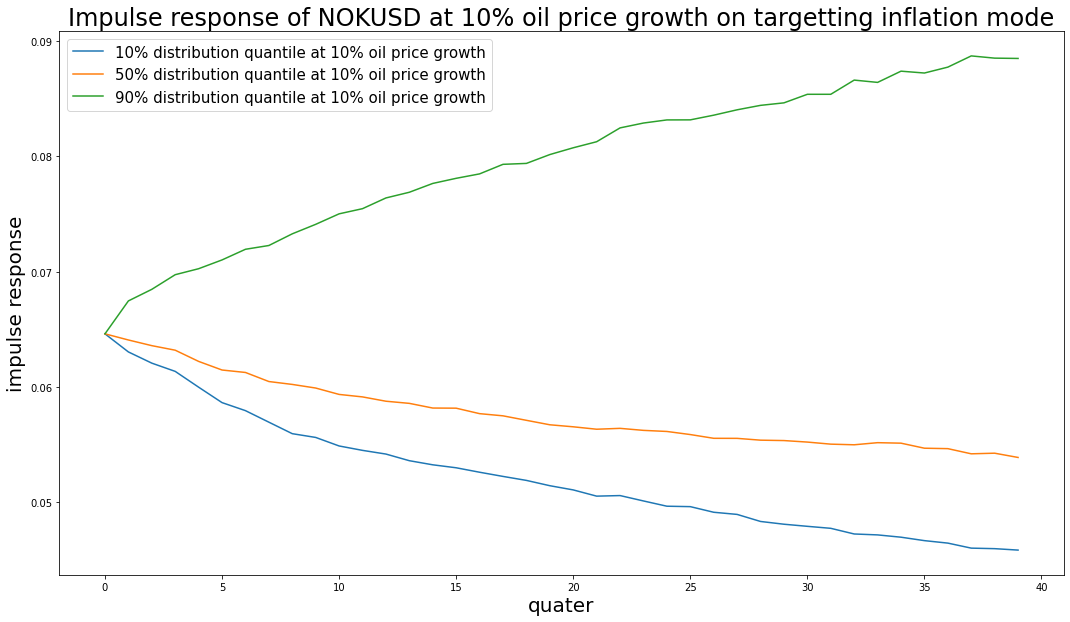

In [738]:
mean0=df_mode0.describe()
mean0=mean0.iloc[4:5, 0:137]
df_md0 = pd.DataFrame()
df_md0 = df_md0.append(df_mode0.quantile(0.1),ignore_index=True)
df_md0 = df_md0.append(mean0,ignore_index=True)
df_md0 = df_md0.append(df_mode0.quantile(0.9),ignore_index=True)
df_md0=df_md0.transpose()
df_md0=df_md0.head(40)
#print(df_md0)
plt.figure(figsize=(18, 10))

plt.plot(df_md0[0],label="10% distribution quantile at 10% oil price growth")
plt.plot(df_md0[1],label="50% distribution quantile at 10% oil price growth")
plt.plot(df_md0[2],label="90% distribution quantile at 10% oil price growth")

matplotlib.rcParams['legend.fontsize'] = 15
plt.xlabel('quater', fontsize=20)
plt.ylabel('impulse response', fontsize=20)
plt.title("Impulse response of NOKUSD at 10% oil price growth on targetting inflation mode", fontsize=24)
plt.legend(fontsize=20)  
plt.legend()
plt.show()

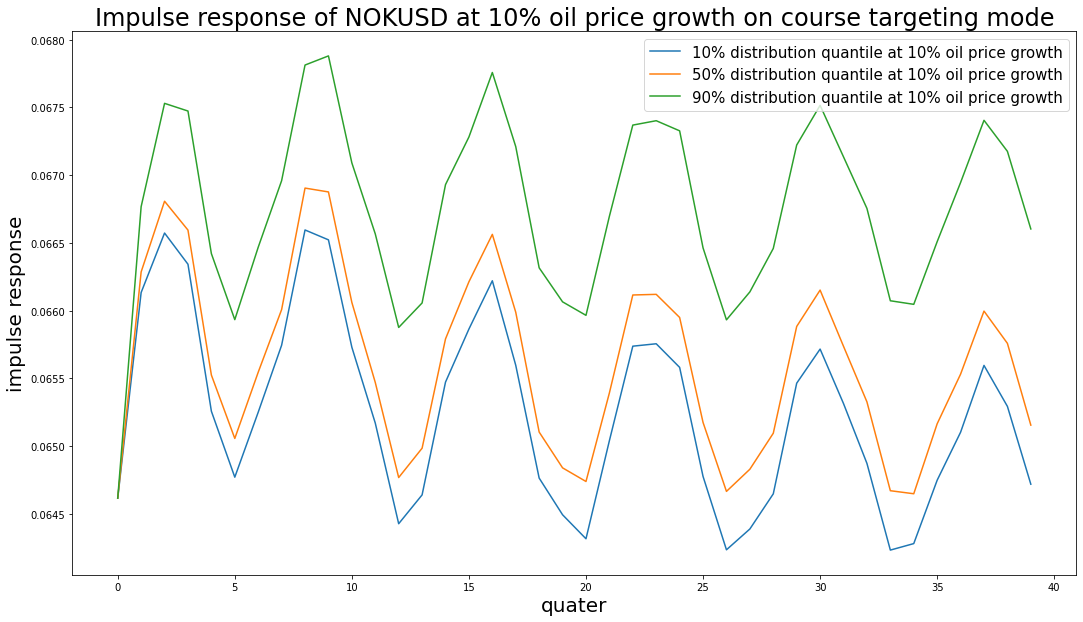

In [737]:
mean1=df_mode1.describe()
mean1=mean1.iloc[4:5, 0:137]
df_md1 = pd.DataFrame()
df_md1 = df_md1.append(df_mode1.quantile(0.1),ignore_index=True)
df_md1 = df_md1.append(mean1,ignore_index=True)
df_md1 = df_md1.append(df_mode1.quantile(0.9),ignore_index=True)
df_md1=df_md1.transpose()
df_md1=df_md1.head(40)
#print(df_md0)
plt.figure(figsize=(18, 10))

plt.plot(df_md1[0],label="10% distribution quantile at 10% oil price growth")
plt.plot(df_md1[1],label="50% distribution quantile at 10% oil price growth")
plt.plot(df_md1[2],label="90% distribution quantile at 10% oil price growth")

matplotlib.rcParams['legend.fontsize'] = 15
plt.xlabel('quater', fontsize=20)
plt.ylabel('impulse response', fontsize=20)
plt.title("Impulse response of NOKUSD at 10% oil price growth on course targeting mode", fontsize=24)
plt.legend(fontsize=20)  
plt.legend()
plt.show()